#Importing required libraries:

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import math
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [156]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Dataset acquired:

In [157]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/DScasestudy/owid.csv')

In [158]:
df.sample(5)

iso_code  ... excess_mortality_cumulative_per_million
37881       ERI  ...                                     NaN
107814      SYC  ...                                     NaN
45053       GMB  ...                                     NaN
55551       ISL  ...                                     NaN
5246        ARG  ...                                     NaN

[5 rows x 67 columns]

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136250 entries, 0 to 136249
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    136250 non-null  object 
 1   continent                                   127568 non-null  object 
 2   location                                    136250 non-null  object 
 3   date                                        136250 non-null  object 
 4   total_cases                                 128722 non-null  float64
 5   new_cases                                   128717 non-null  float64
 6   new_cases_smoothed                          127677 non-null  float64
 7   total_deaths                                117477 non-null  float64
 8   new_deaths                                  117673 non-null  float64
 9   new_deaths_smoothed                         127677 non-null  float64
 

In [160]:
df.describe()

total_cases  ...  excess_mortality_cumulative_per_million
count  1.287220e+05  ...                              4784.000000
mean   2.124077e+06  ...                               806.187966
std    1.208415e+07  ...                              1185.801394
min    1.000000e+00  ...                             -1728.844404
25%    2.518000e+03  ...                               -39.561719
50%    2.901600e+04  ...                               376.565768
75%    2.755020e+05  ...                              1386.387282
max    2.610750e+08  ...                              6180.171325

[8 rows x 62 columns]

In [161]:
df.shape

(136250, 67)

In [162]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [163]:
'''obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,":",value)'''

df.isnull().sum()

iso_code                                        0
continent                                    8682
location                                        0
date                                            0
total_cases                                  7528
                                            ...  
human_development_index                     18450
excess_mortality_cumulative_absolute       131466
excess_mortality_cumulative                131466
excess_mortality                           131466
excess_mortality_cumulative_per_million    131466
Length: 67, dtype: int64

#Preprocessing:

###Replacing null values of specific columns with their mean:

In [164]:
df['population'].fillna(df['population'].mean(), inplace=True)
df['median_age'].fillna(df['median_age'].mean(), inplace=True)
df['stringency_index'].fillna(df['stringency_index'].mean(), inplace=True)
df['handwashing_facilities'].fillna(df['handwashing_facilities'].mean(), inplace=True)
df['cardiovasc_death_rate'].fillna(df['cardiovasc_death_rate'].mean(), inplace=True)
df['diabetes_prevalence'].fillna(df['diabetes_prevalence'].mean(), inplace=True)
df['life_expectancy'].fillna(df['life_expectancy'].mean(), inplace=True)
df['population_density'].fillna(df['population_density'].mean(), inplace=True)
df['extreme_poverty'].fillna(df['extreme_poverty'].mean(), inplace=True)
df['hospital_beds_per_thousand'].fillna(df['hospital_beds_per_thousand'].mean(), inplace=True)

###Replacing null values of specific columns with their mode (object datatype)

In [165]:
df['continent'].fillna(df['continent'].mode()[0], inplace=True)

###Replacing null values of specific coluns with ffill and bfill (because it is a timeseries)

In [166]:
df['total_cases'].fillna(method="ffill", inplace=True)
df['total_cases_per_million'].fillna(method="ffill", inplace=True)
df['total_deaths'].fillna(method="ffill", inplace=True)
df['total_deaths_per_million'].fillna(method="ffill", inplace=True)
df['total_tests'].fillna(method="ffill", inplace=True)
df['total_tests_per_thousand'].fillna(method="ffill", inplace=True)
df['icu_patients'].fillna(method="ffill", inplace=True)
df['weekly_hosp_admissions'].fillna(method="ffill", inplace=True)
df['weekly_icu_admissions'].fillna(method="ffill", inplace=True)
df['people_vaccinated'].fillna(method="ffill", inplace=True)
df['people_vaccinated_per_hundred'].fillna(method="ffill", inplace=True)
df['people_fully_vaccinated'].fillna(method="ffill", inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(method="ffill", inplace=True)
df['new_cases'].fillna(method="ffill", inplace=True)
df['new_cases_per_million'].fillna(method="ffill", inplace=True)
df['new_deaths'].fillna(method="ffill", inplace=True)
df['new_deaths_per_million'].fillna(method="ffill", inplace=True)
df['new_tests'].fillna(method="ffill", inplace=True)
df['new_tests_per_thousand'].fillna(method="ffill", inplace=True)
df['new_vaccinations'].fillna(method="ffill", inplace=True)
df['positive_rate'].fillna(method="ffill", inplace=True)

df['total_cases'].fillna(method="bfill", inplace=True)
df['total_cases_per_million'].fillna(method="bfill", inplace=True)
df['total_deaths'].fillna(method="bfill", inplace=True)
df['total_deaths_per_million'].fillna(method="bfill", inplace=True)
df['total_tests'].fillna(method="bfill", inplace=True)
df['total_tests_per_thousand'].fillna(method="bfill", inplace=True)
df['icu_patients'].fillna(method="bfill", inplace=True)
df['weekly_hosp_admissions'].fillna(method="bfill", inplace=True)
df['weekly_icu_admissions'].fillna(method="bfill", inplace=True)

df['new_cases'].fillna(method="bfill", inplace=True)
df['new_cases_per_million'].fillna(method="bfill", inplace=True)
df['new_deaths'].fillna(method="bfill", inplace=True)
df['new_deaths_per_million'].fillna(method="bfill", inplace=True)
df['new_tests'].fillna(method="bfill", inplace=True)
df['new_tests_per_thousand'].fillna(method="bfill", inplace=True)
df['new_vaccinations'].fillna(method="bfill", inplace=True)
df['positive_rate'].fillna(method="bfill", inplace=True)

##Replacing nan values with 0s because in this case no data means vaccination didnt start yet

In [167]:
df['people_vaccinated'].fillna(0, inplace=True)
df['people_vaccinated_per_hundred'].fillna(0, inplace=True)
df['people_fully_vaccinated'].fillna(0, inplace=True)
df['people_fully_vaccinated_per_hundred'].fillna(0, inplace=True)
df['gdp_per_capita'].fillna(0, inplace=True)

In [168]:
#pd.options.display.min_rows = 100
df.isnull().sum()

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                     0
                                            ...  
human_development_index                     18450
excess_mortality_cumulative_absolute       131466
excess_mortality_cumulative                131466
excess_mortality                           131466
excess_mortality_cumulative_per_million    131466
Length: 67, dtype: int64

##New dataframe with the required preprocessed columns

In [169]:
newdf=df[["iso_code","continent","location","date","population","new_cases","new_cases_per_million","new_deaths","new_deaths_per_million","new_tests","new_tests_per_thousand","new_vaccinations","total_cases","total_cases_per_million","total_deaths","total_deaths_per_million","total_tests","total_tests_per_thousand","people_vaccinated","people_vaccinated_per_hundred","people_fully_vaccinated","people_fully_vaccinated_per_hundred","icu_patients","weekly_hosp_admissions","weekly_icu_admissions","median_age","positive_rate","stringency_index","handwashing_facilities","cardiovasc_death_rate","diabetes_prevalence","life_expectancy","population_density", "extreme_poverty","gdp_per_capita", "hospital_beds_per_thousand"]]

In [170]:
newdf.shape

(136250, 36)

In [171]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136250 entries, 0 to 136249
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   iso_code                             136250 non-null  object 
 1   continent                            136250 non-null  object 
 2   location                             136250 non-null  object 
 3   date                                 136250 non-null  object 
 4   population                           136250 non-null  float64
 5   new_cases                            136250 non-null  float64
 6   new_cases_per_million                136250 non-null  float64
 7   new_deaths                           136250 non-null  float64
 8   new_deaths_per_million               136250 non-null  float64
 9   new_tests                            136250 non-null  float64
 10  new_tests_per_thousand               136250 non-null  float64
 11  new_vaccinati

In [172]:
newdf.dtypes

iso_code                                object
continent                               object
location                                object
date                                    object
population                             float64
new_cases                              float64
new_cases_per_million                  float64
new_deaths                             float64
new_deaths_per_million                 float64
new_tests                              float64
new_tests_per_thousand                 float64
new_vaccinations                       float64
total_cases                            float64
total_cases_per_million                float64
total_deaths                           float64
total_deaths_per_million               float64
total_tests                            float64
total_tests_per_thousand               float64
people_vaccinated                      float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated                float64
people_fully_

In [173]:
newdf.isnull().sum()

iso_code                               0
continent                              0
location                               0
date                                   0
population                             0
new_cases                              0
new_cases_per_million                  0
new_deaths                             0
new_deaths_per_million                 0
new_tests                              0
new_tests_per_thousand                 0
new_vaccinations                       0
total_cases                            0
total_cases_per_million                0
total_deaths                           0
total_deaths_per_million               0
total_tests                            0
total_tests_per_thousand               0
people_vaccinated                      0
people_vaccinated_per_hundred          0
people_fully_vaccinated                0
people_fully_vaccinated_per_hundred    0
icu_patients                           0
weekly_hosp_admissions                 0
weekly_icu_admis

In [174]:
newdf.sample(5)

iso_code continent  ... gdp_per_capita hospital_beds_per_thousand
98649        POL    Europe  ...      27216.445                   6.620000
89959        NGA    Africa  ...       5338.454                   3.028725
99142        PRT    Europe  ...      27936.896                   3.390000
52775   OWID_HIC    Africa  ...          0.000                   3.028725
133207       VNM      Asia  ...       6171.884                   2.600000

[5 rows x 36 columns]

#Visualization:

In [ ]:
df1=newdf[["continent","date","new_cases","total_cases"]]
ContinentGroup=df1.groupby(["continent","date"],as_index=False).sum().pivot('date','continent')
ContinentGroup.sample(5)

new_cases            ... total_cases              
continent      Africa      Asia  ...     Oceania South America
date                             ...                          
2020-02-27     4667.0    1092.0  ...  45979716.0      466749.0
2020-03-06    14242.0    2047.0  ...  45979765.0          43.0
2021-06-09  1304164.0  191070.0  ...  20421181.0    30046084.0
2020-12-24  2232659.0   88735.0  ...     31252.0    12745119.0
2020-02-09     9432.0    3025.0  ...  45979716.0      466746.0

[5 rows x 12 columns]

###Line Graphs:

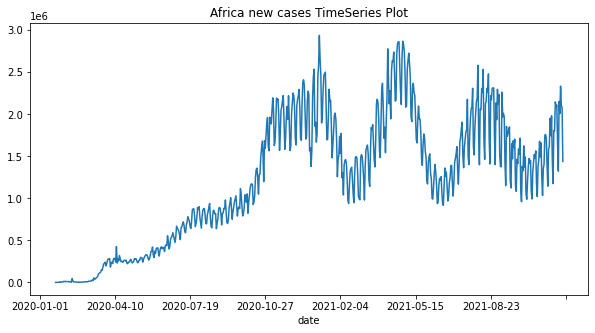

In [ ]:
ContinentGroup["new_cases"]["Africa"].plot(figsize=(10,5),title="Africa new cases TimeSeries Plot")

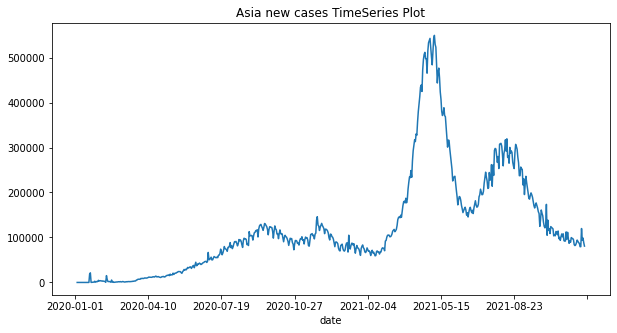

In [ ]:
ContinentGroup["new_cases"]["Asia"].plot(figsize=(10,5),title="Asia new cases TimeSeries Plot")

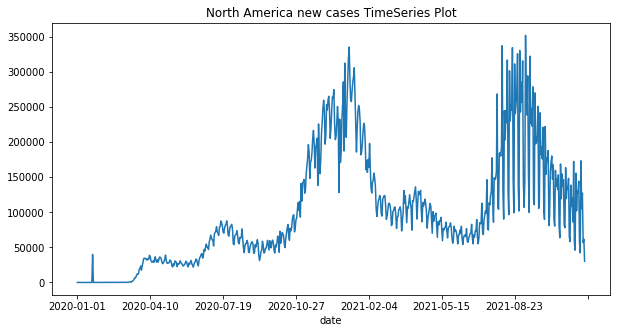

In [ ]:
ContinentGroup["new_cases"]["North America"].plot(figsize=(10,5),title="North America new cases TimeSeries Plot")

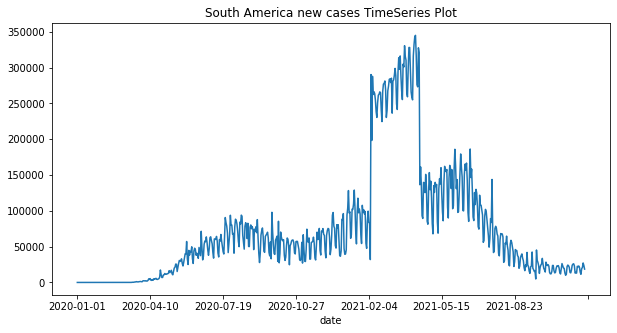

In [ ]:
ContinentGroup["new_cases"]["South America"].plot(figsize=(10,5),title="South America new cases TimeSeries Plot")

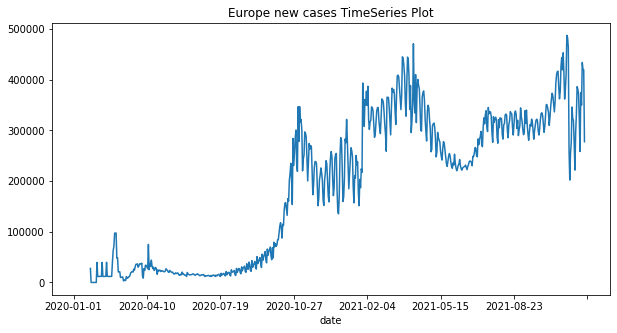

In [ ]:
ContinentGroup["new_cases"]["Europe"].plot(figsize=(10,5),title="Europe new cases TimeSeries Plot")

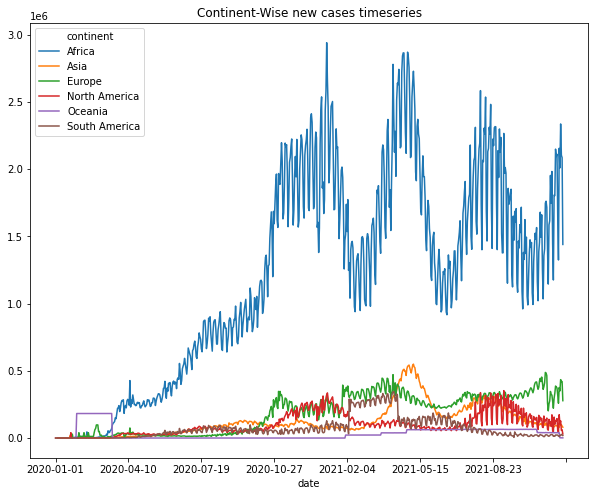

In [ ]:
ContinentGroup["new_cases"].plot(figsize=(10,8),title="Continent-Wise new cases timeseries")

###Histograms:

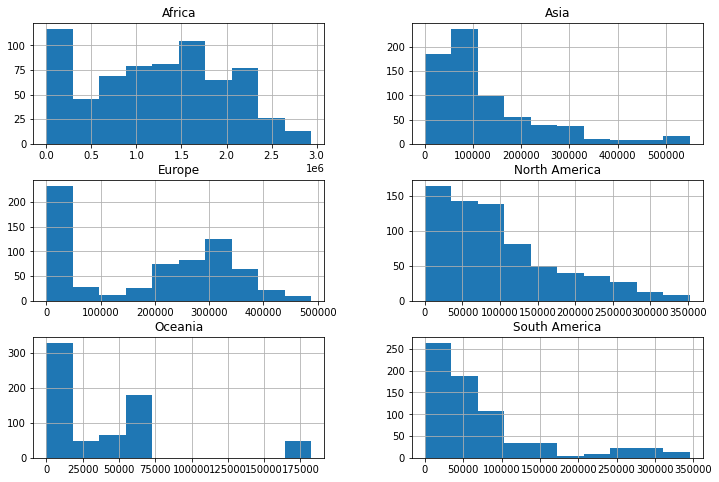

In [ ]:
ContinentGroup["new_cases"].hist(figsize=(12,8))
plt.show()

###Box Plots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


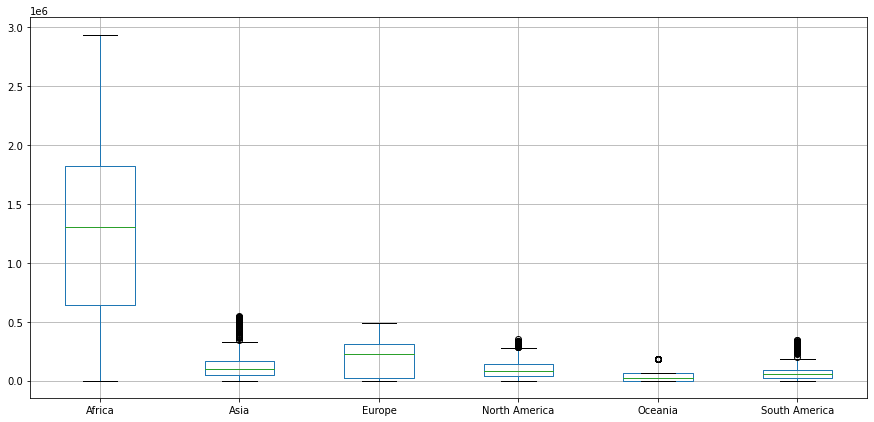

In [ ]:
ContinentGroup["new_cases"].boxplot(figsize=(15,7))#Box-plot for new cases per day of each of the Continents
plt.show()

###Bar Graph

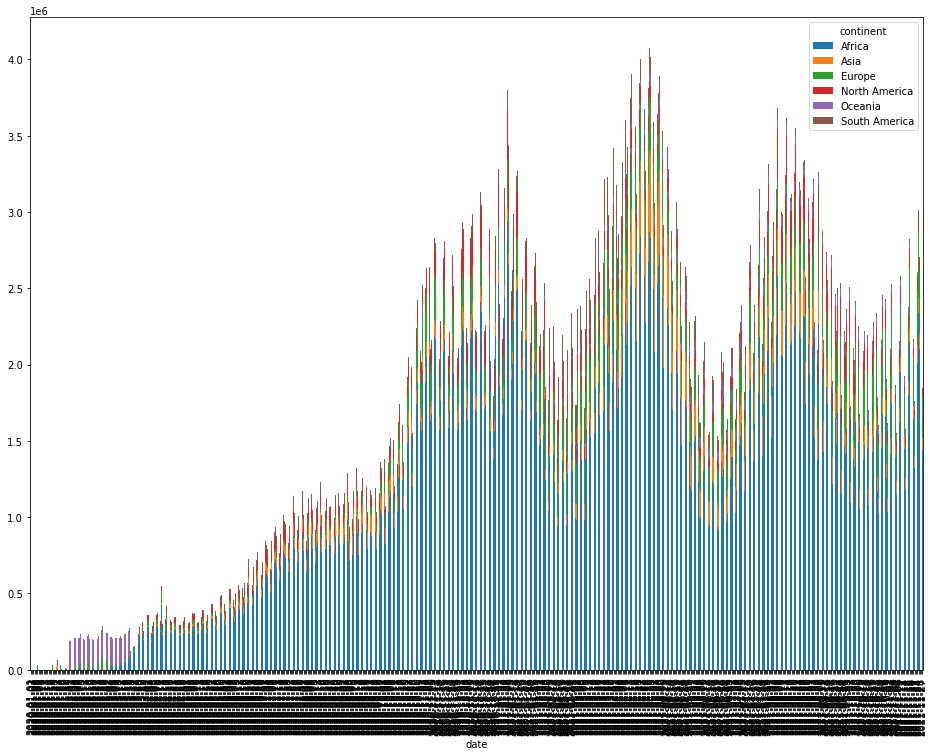

In [ ]:
ContinentGroup["new_cases"].plot(figsize=(16,12),kind="bar",stacked=True)
plt.show()

##Pie chart of Total cases from each continent:

In [ ]:
df1=newdf[["continent","date","total_cases"]]
pieGroup=df1.groupby(["continent"],as_index=False).sum()
pieGroup.sample(5)

continent   total_cases
1           Asia  2.069262e+10
2         Europe  3.189834e+10
3  North America  2.293390e+10
5  South America  1.413204e+10
0         Africa  2.102590e+11

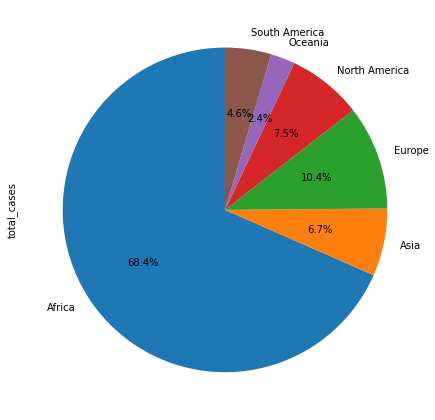

In [ ]:
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
pieGroup.plot(kind='pie', y = 'total_cases', ax=ax1, autopct='%1.1f%%', startangle=90, shadow=False, labels=pieGroup['continent'], legend = False, fontsize=10)

##Country wise new cases data visualization:

In [ ]:
df2=newdf[["iso_code","date","new_cases"]]
ISOGroup=df2.groupby(["iso_code","date"],as_index=False).sum().pivot('date','iso_code').fillna(0)
ISOGroup.sample(5)

new_cases                      ...                               
iso_code         ABW     AFG    AGO  AIA  ...   YEM      ZAF     ZMB     ZWE
date                                      ...                               
2021-04-15     517.0    42.0  110.0  9.0  ...  75.0   1372.0   143.0    53.0
2021-05-04     517.0   263.0  151.0  9.0  ...  27.0   1187.0    82.0    34.0
2020-06-11       0.0   748.0    5.0  0.0  ...  31.0   3147.0     0.0    12.0
2020-05-26       0.0   737.0    0.0  0.0  ...  16.0    649.0     0.0     0.0
2021-07-16     517.0  1198.0  101.0  9.0  ...   5.0  15939.0  1215.0  2296.0

[5 rows x 237 columns]

###Line Graph:

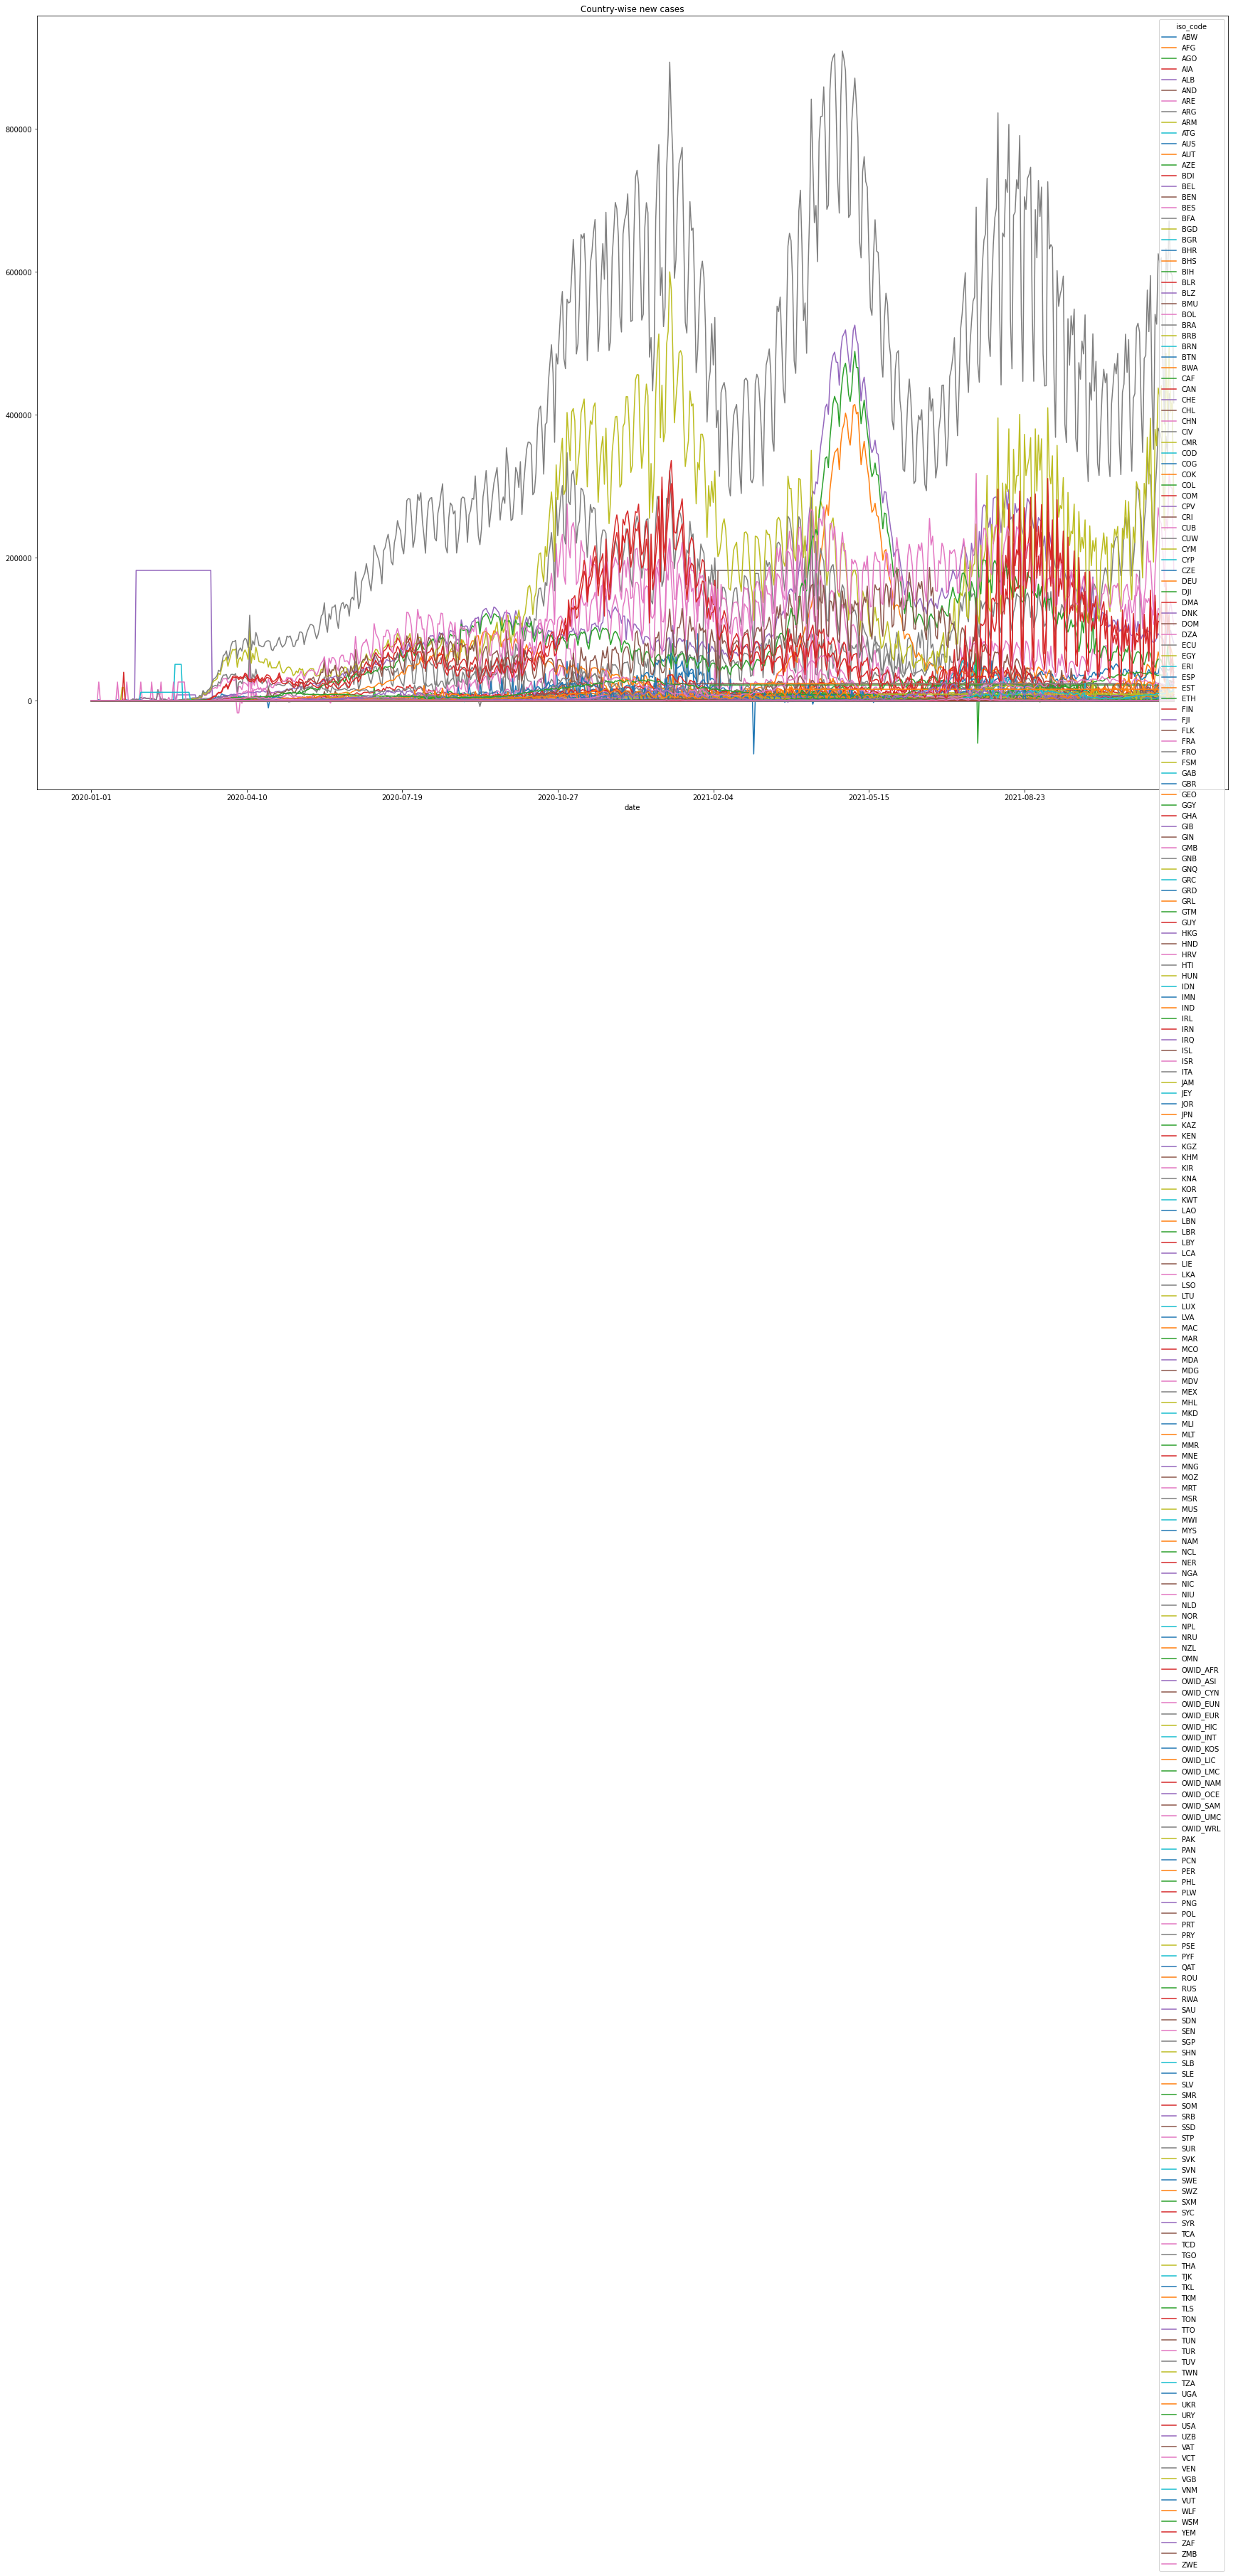

In [ ]:
ISOGroup["new_cases"].plot(figsize=(30,20),title="Country-wise new cases")

In [ ]:
#ISOGroup['new_cases'].max().max()
print(ISOGroup.max().max())
ISOGroup[ISOGroup['new_cases'] == 906034.0]

908290.0


new_cases                          ...                            
iso_code         ABW AFG AGO AIA ALB AND ARE  ... VUT WLF WSM YEM ZAF ZMB ZWE
date                                          ...                            
2020-01-01       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2020-01-02       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2020-01-03       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2020-01-04       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2020-01-05       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
...              ...  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..
2021-11-23       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2021-11-24       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2021-11-25       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2021-11-26       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN
2021-11-27       NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN NaN NaN NaN NaN NaN

[697 rows x 237 columns]

###Histograms

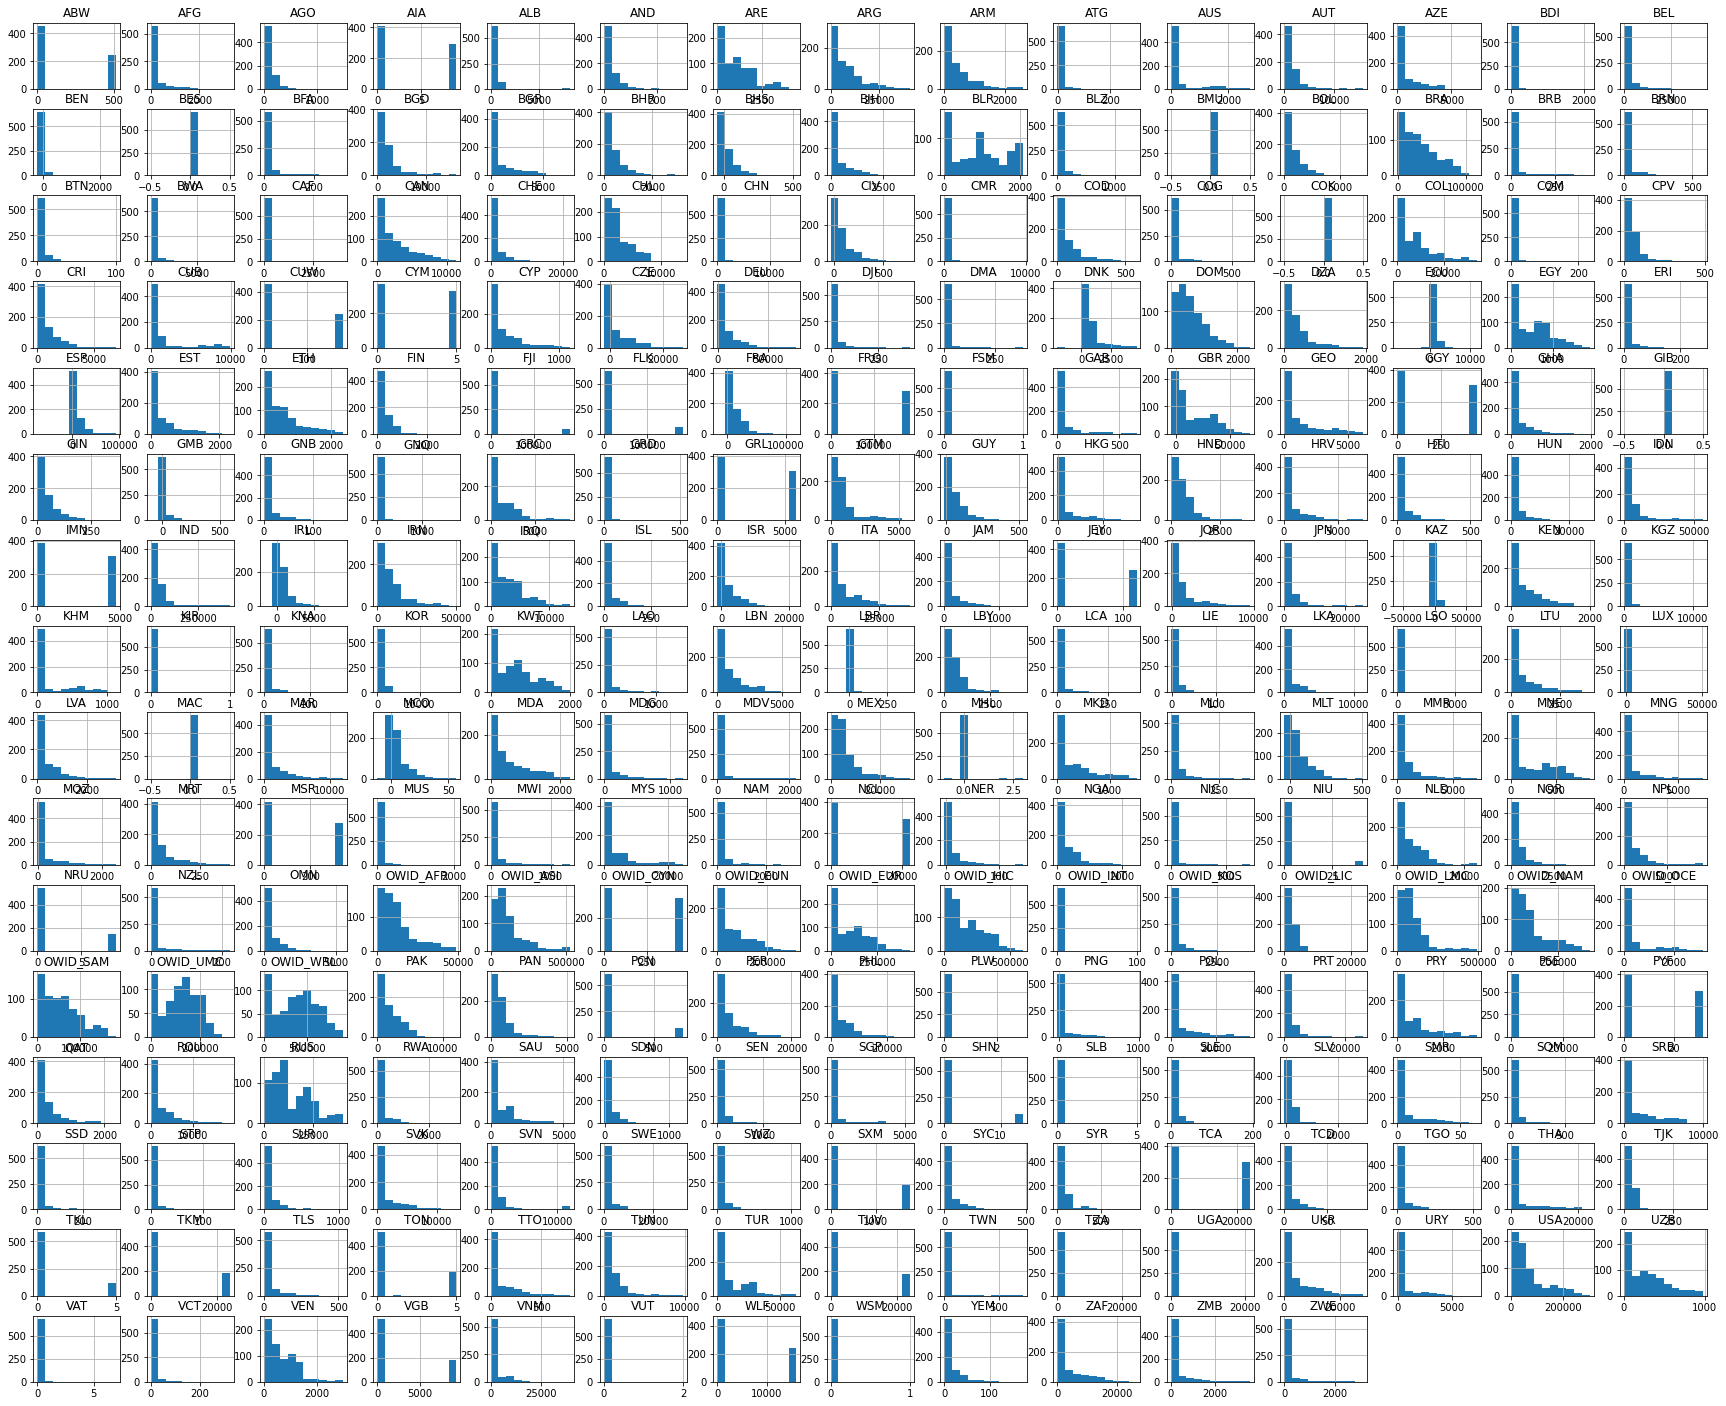

In [ ]:
ISOGroup["new_cases"].hist(figsize=(30,25))
plt.title("Distribution of number of new-cases in a day")
plt.show()

###Box Plot

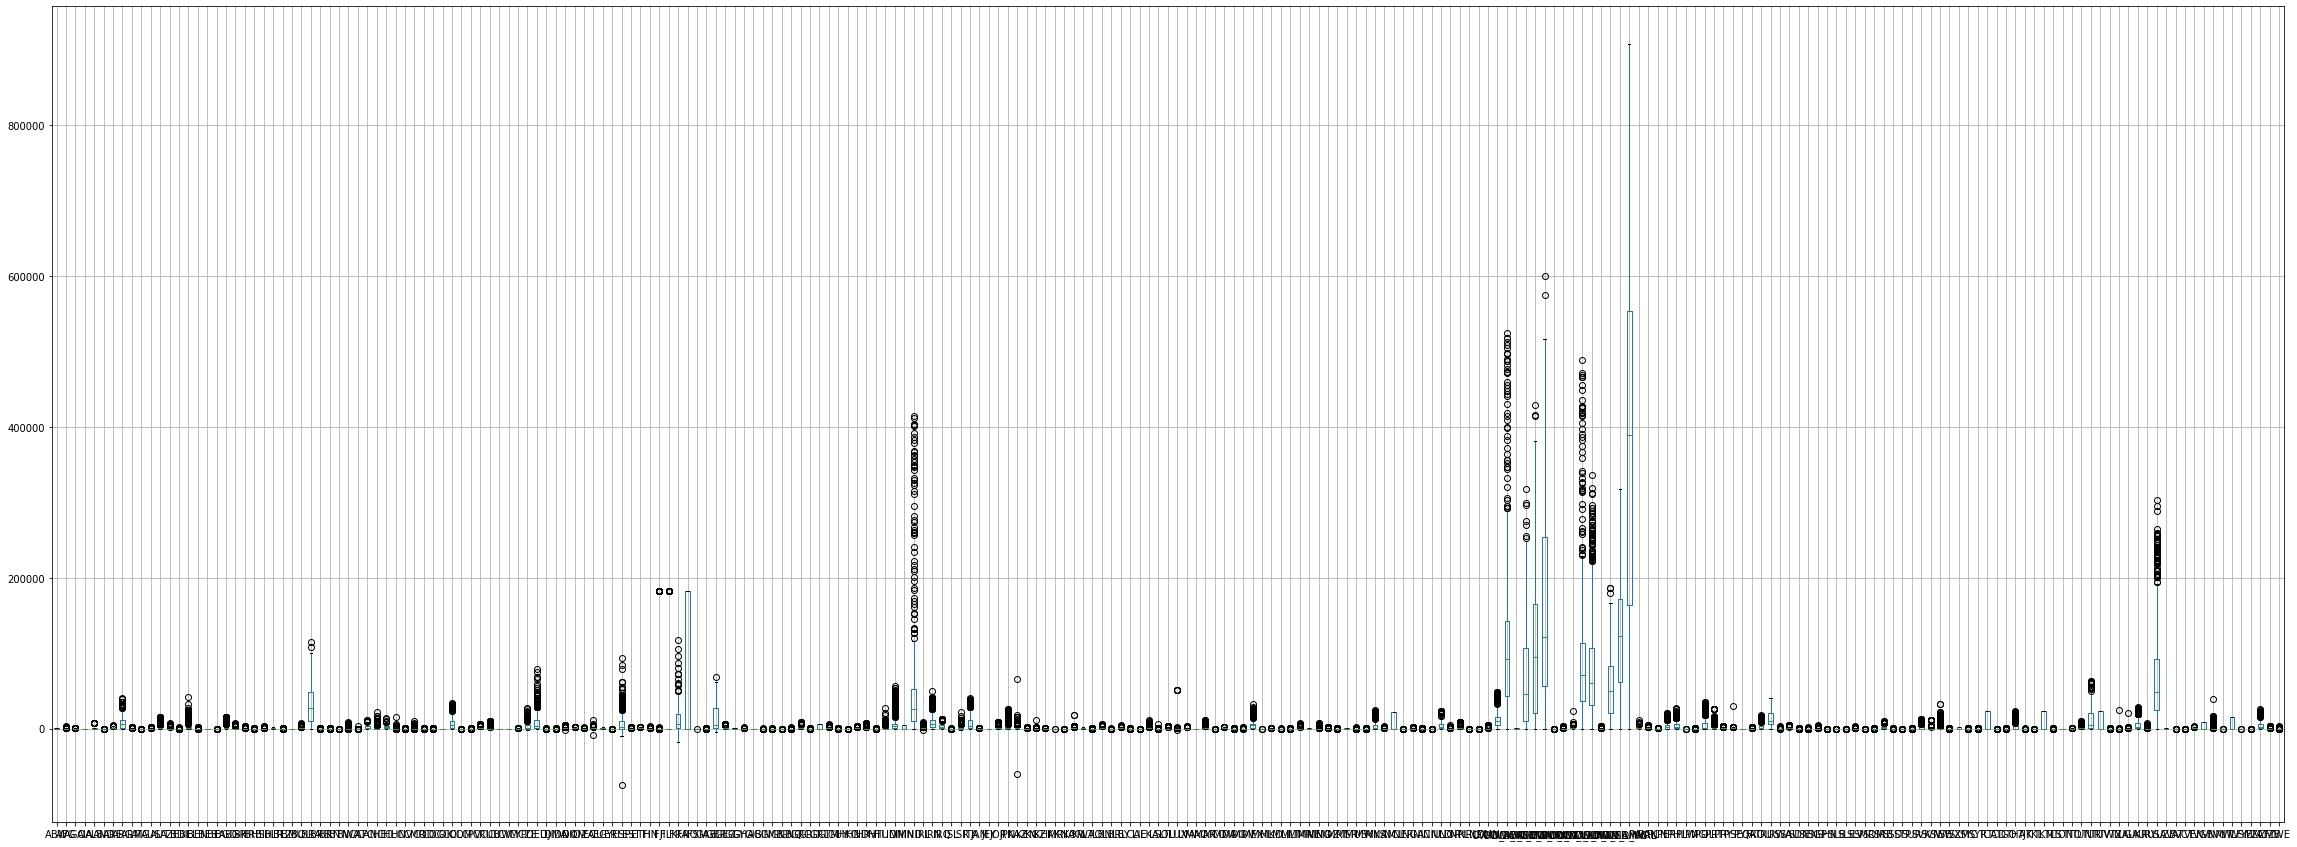

In [ ]:
ISOGroup["new_cases"].boxplot(figsize=(40,15))#Box-plot for new cases per day of each of the countries
plt.show()

##Per day data visualization

In [ ]:
df3=newdf[["date","new_cases"]]
DateGroup=df3.groupby(["date"],as_index=False).sum()
DateGroup.sample(5)

date  new_cases
182  2020-07-01   873605.0
499  2021-05-14  3242599.0
626  2021-09-18  1893451.0
635  2021-09-27  2219704.0
461  2021-04-06  2974332.0

###Line Graph:

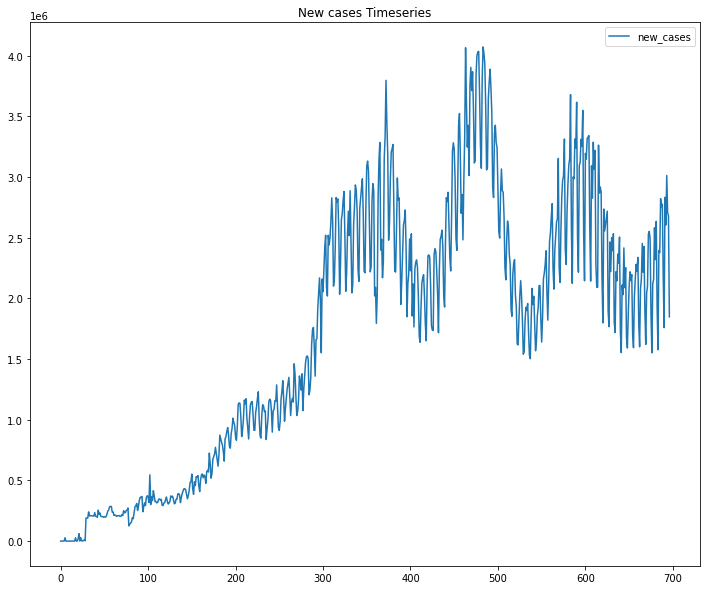

In [ ]:
DateGroup.plot(figsize=(12,10),title="New cases Timeseries")

###Histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2ac6c5490>]],
      dtype=object)

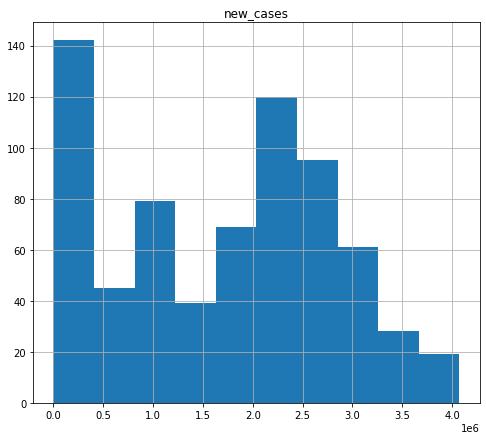

In [ ]:
DateGroup.hist(figsize=(8,7))

##India:

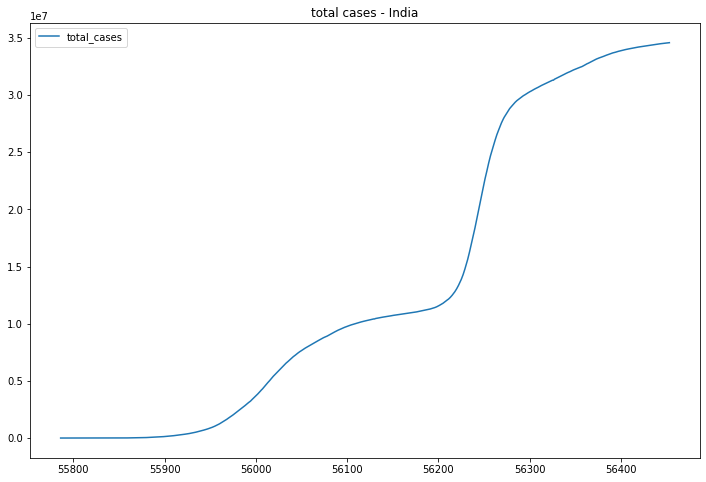

In [ ]:
#ISOGroup["new_cases"].plot(figsize=(30,20),title="Country-wise new cases")
newdf[newdf["location"]=="India"]["total_cases"].plot(figsize=(12,8),title="total cases - India")
plt.legend()
plt.show()

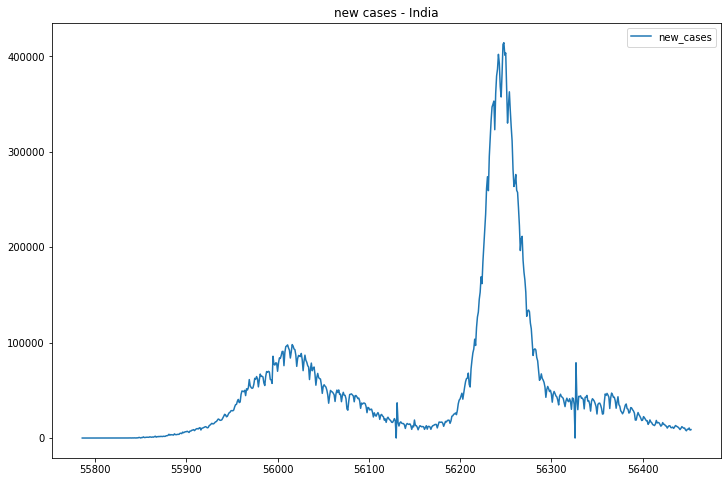

In [ ]:
newdf[newdf["location"]=="India"]["new_cases"].plot(figsize=(12,8),title="new cases - India")
plt.legend()
plt.show()

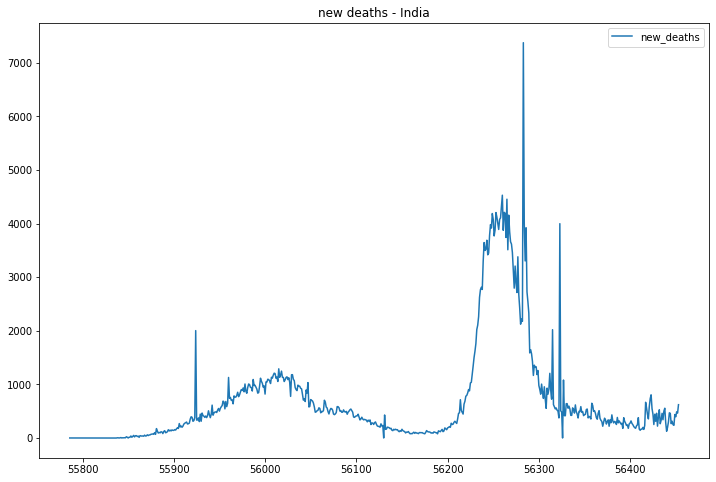

In [ ]:
newdf[newdf["location"]=="India"]["new_deaths"].plot(figsize=(12,8),title="new deaths - India")
plt.legend()
plt.show()

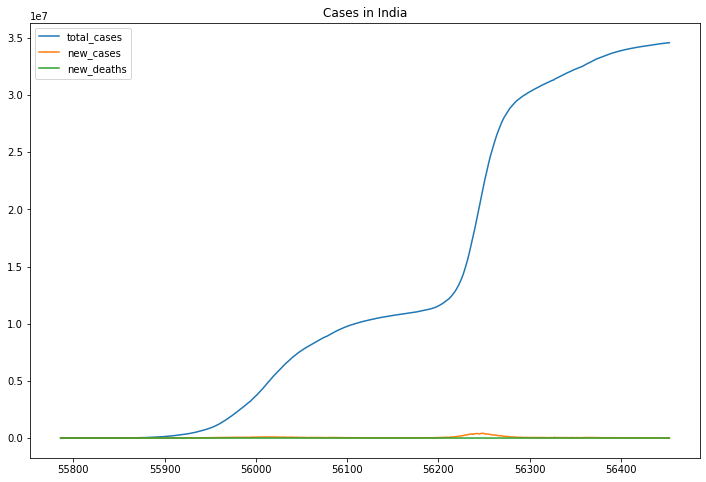

In [ ]:
newdf[newdf["location"]=="India"]["total_cases"].plot(figsize=(12,8))
newdf[newdf["location"]=="India"]["new_cases"].plot(figsize=(12,8))
newdf[newdf["location"]=="India"]["new_deaths"].plot(figsize=(12,8))
plt.title("Cases in India")
plt.legend()
plt.show()

##Comparison bw india and other countries:

In [ ]:
countrytotaldata=newdf[["iso_code","date","total_cases","new_cases","people_fully_vaccinated"]]
CounTGroup=countrytotaldata.groupby(["iso_code","date"],as_index=False).sum().pivot('date','iso_code').fillna(0)
CounTGroup.sample(5)

total_cases                    ... people_fully_vaccinated                    
iso_code           ABW      AFG      AGO  ...                     ZAF       ZMB       ZWE
date                                      ...                                            
2020-08-17         0.0  37682.0   1935.0  ...                564612.0  353822.0  671006.0
2020-11-08         0.0  42033.0  12433.0  ...                564612.0  353822.0  671006.0
2020-10-11         0.0  39885.0   6366.0  ...                564612.0  353822.0  671006.0
2021-02-26         0.0  55696.0  20759.0  ...                 63648.0  353822.0  671006.0
2021-05-28    337522.0  69130.0  33944.0  ...                479768.0    5286.0  320146.0

[5 rows x 711 columns]

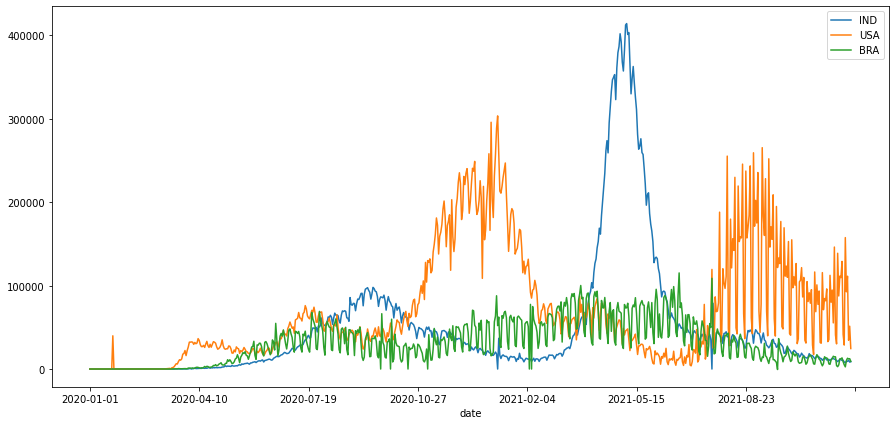

In [ ]:
CounTGroup['new_cases']["IND"].plot(figsize=(15,7))
CounTGroup['new_cases']["USA"].plot(figsize=(15,7))
CounTGroup['new_cases']["BRA"].plot(figsize=(15,7))
plt.legend()
plt.show()

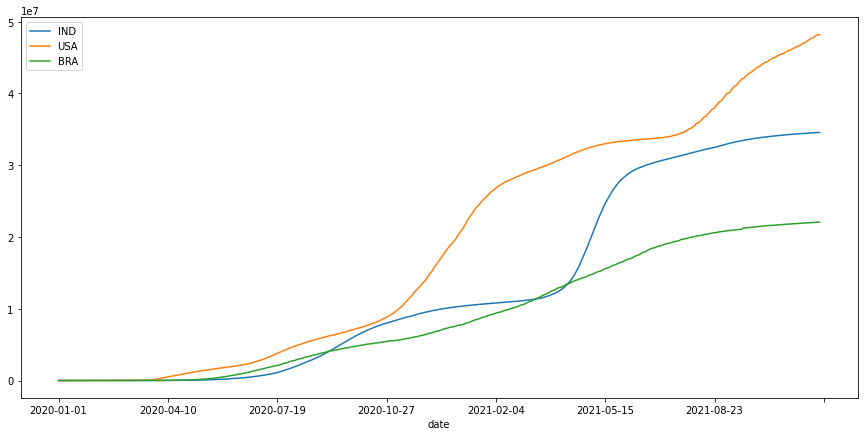

In [ ]:
CounTGroup['total_cases']["IND"].plot(figsize=(15,7))
CounTGroup['total_cases']["USA"].plot(figsize=(15,7))
CounTGroup['total_cases']["BRA"].plot(figsize=(15,7))
plt.legend()
plt.show()

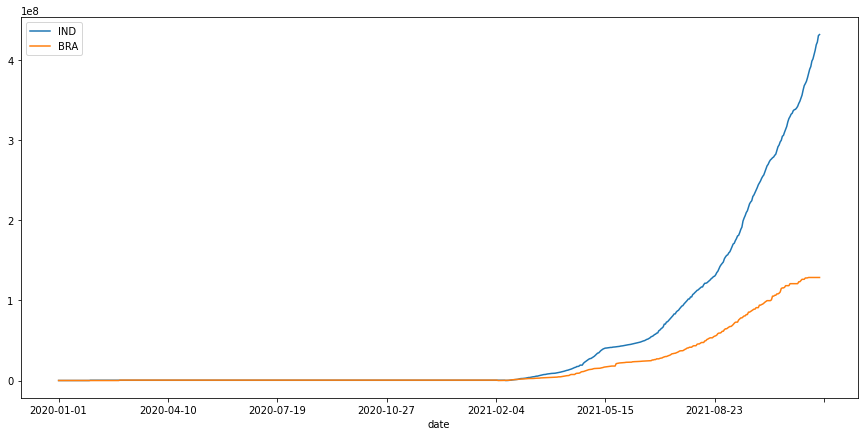

In [ ]:
CounTGroup['people_fully_vaccinated']["IND"].plot(figsize=(15,7))
CounTGroup['people_fully_vaccinated']["BRA"].plot(figsize=(15,7))
plt.legend()
plt.show()

##Joinplots:

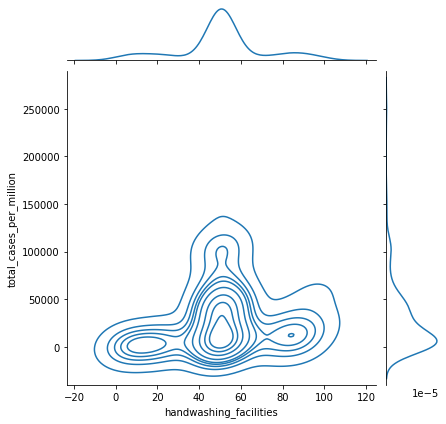

In [ ]:
d=newdf[['iso_code','handwashing_facilities','total_cases_per_million']].groupby("iso_code").agg("mean")
sns.jointplot(x="handwashing_facilities",y="total_cases_per_million",data=d, kind='kde')
plt.show()

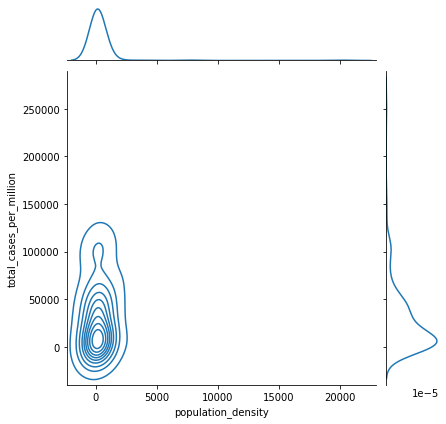

In [ ]:
d=newdf[['iso_code','population_density','total_cases_per_million']].groupby("iso_code").agg("mean")
sns.jointplot(x="population_density",y="total_cases_per_million",data=d,kind="kde")
plt.show()

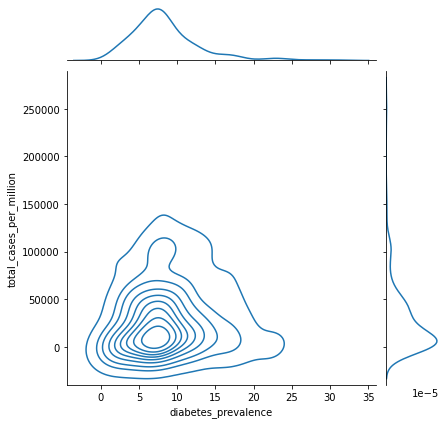

In [ ]:
d=newdf[['iso_code','diabetes_prevalence','total_cases_per_million']].groupby("iso_code").agg("mean")
sns.jointplot(x="diabetes_prevalence",y="total_cases_per_million",data=d,kind="kde")
plt.show()

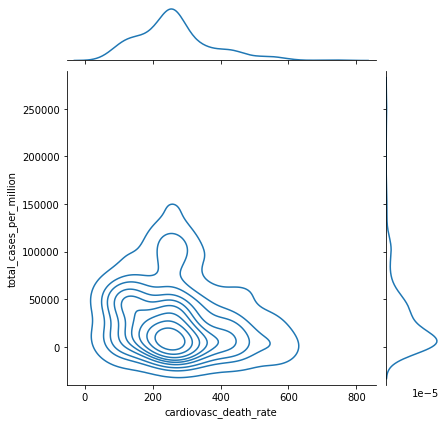

In [ ]:
d=newdf[['iso_code','cardiovasc_death_rate','total_cases_per_million']].groupby("iso_code").agg("mean")
sns.jointplot(x="cardiovasc_death_rate",y="total_cases_per_million",data=d,kind="kde")
plt.show()

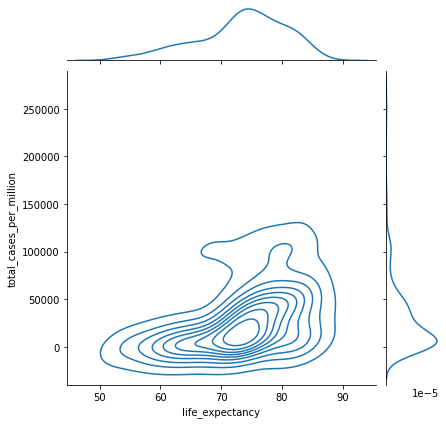

In [ ]:
d=newdf[['iso_code','life_expectancy','total_cases_per_million']].groupby("iso_code").agg("mean")
sns.jointplot(x="life_expectancy",y="total_cases_per_million",data=d,kind="kde")
plt.show()

#Term 2

#Hypothesis testing

In [175]:
import scipy.stats as st
NewCaseData=newdf['new_cases_per_million']
NewCaseMean=NewCaseData.mean()
NewCaseStd=NewCaseData.std()
print("Population mean for New cases is:"+str(NewCaseMean))
print("Population Standard Deviation for New cases is:"+str(NewCaseStd))

Population mean for New cases is:96.180296829357
Population Standard Deviation for New cases is:219.336685943828


## Hypothesis 1:


 The average cases per million in countries with extreme poverty<=1 is less than that of the population average

Test used: Z-test

Null Hypothesis        : Sample Mean >= Population Mean 


Alternate Hypothesis   : Sample Mean <= Population mean

In [176]:
Extr=newdf[["extreme_poverty","new_cases_per_million"]]
Extr=Extr[Extr['extreme_poverty']<=1]
Extr.reset_index(inplace=True)
Extr=Extr.drop('index',axis=1)

In [177]:
SampleExtrMean=Extr["new_cases_per_million"].sample(100,random_state=2).mean()
SampleExtrStd=Extr['new_cases_per_million'].sample(100,random_state=2).std()

In [178]:
#Null Hypothesis: SampleExtrMean >= Population Mean
#Alternate Hypothesis: SampleExtrMean < Population Mean

#Left tailed test

n = 100
xbar = SampleExtrMean
mu = NewCaseMean
sigmabar = SampleExtrStd
alpha = 0.05 
#z = (xbar-mu)/sigmabar
z = (xbar-mu)/(NewCaseStd/(n**0.5))
z_critical = (st.norm.ppf(0.05))
print("z-value      = ", z)
print("z_critical   = ",z_critical)
if((z)<(z_critical)):
    rejection = True 
else:
    rejection = False
print(rejection)

z-value      =  1.5319454210796375
z_critical   =  -1.6448536269514729
False


In [179]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

null hypothesis is valid


## Hypothesis 2: 


The average cases per million in countries with gdp>20,000 is more than that of the population average

Test used: Z-test

Null Hypothesis: Sample Mean <= Population Mean

Alternate Hypothesis: Sample Mean > Population Mean

In [180]:
Gdp=newdf[['gdp_per_capita',"new_cases_per_million"]]
Gdp=Gdp[Gdp['gdp_per_capita']>20000]
Gdp.reset_index(inplace=True)
Gdp=Gdp.drop('index',axis=1)

In [181]:
SampleGdpMean=Gdp["new_cases_per_million"].sample(100,random_state=2).mean()
SampleGdpStd=Gdp['new_cases_per_million'].sample(100,random_state=2).std()

In [182]:
#Null Hypothesis: Sample Mean <= Population Mean
#Alternate Hypothesis: SampleGdpMean > Population Mean

#Right tailed test

n = 100
xbar = SampleGdpMean
mu = NewCaseMean
sigmabar = SampleGdpStd
alpha = 0.05
#z = (xbar-mu)/sigmabar
z = (xbar-mu)/(NewCaseStd/(n**0.5))
z_critical = abs(st.norm.ppf(0.05)) #Absolute value taken as the it's a right-tailed test and the original value will be negative
print("z value      =:",z)
print("z_critical:  =",z_critical)
if(z < z_critical):
    rejection = False 
else:
    rejection = True
print(rejection)

z value      =: 2.036114158398483
z_critical:  = 1.6448536269514729
True


In [183]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

we reject the null hypothesis


##Hypothesis 3:

The average cases per million in countries with Life Expectancy < 70 is more than that of the average cases worldwide

Test to be used: p-value method

Null Hypothesis: Sample Mean <= Population Mean

Alternate Hypothesis: Sample Mean > Population Mean

In [184]:
LE=newdf[['life_expectancy',"new_cases_per_million"]]
LE=LE[LE['life_expectancy']<70]
LE=LE.reset_index()
LE=LE.drop('index',axis=1)

In [185]:
SampleLEMean=LE["new_cases_per_million"].sample(100,random_state=2).mean()
SampleLEStd=LE['new_cases_per_million'].sample(100,random_state=2).std()

In [186]:
#Null Hypothesis: Sample Mean <= Population Mean
#Alternate Hypothesis: SampleGdpMean > Population Mean

#Right tailed test

n = 100
xbar = SampleLEMean
mu = NewCaseMean
sigmabar = SampleLEStd
alpha = 0.01

z = (xbar-mu)/(NewCaseStd/np.sqrt(n))
print("Z value:     ",z )

p_val = (1 - st.norm.cdf(abs(z)))   #cdf because right tailed test
print("P value:     ",p_val)

if(p_val < alpha):                  #If P value < alpha then reject
    rejection = True 
else:
    rejection = False
print(rejection)

Z value:      -3.637004748480005
P value:      0.00013791342407332152
True


In [187]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

we reject the null hypothesis


Result: Our hypothesis that the average cases per million in countries with Life Expectancy < 70 is more than that of the average cases worldwide is accepted.

##Hypothesis 4:

The average cases per million in countries with Handwashing Facilities<25 and >75 is more than that of the population average

Test used: p-value method

Null Hypothesis: Sample Mean <= Population Mean

Alternate Hypothesis: Sample Mean > Population Mean

In [188]:
HW=newdf[['handwashing_facilities',"new_cases_per_million"]]
HW=HW[(HW['handwashing_facilities']<=25)|(HW['handwashing_facilities']>=75)]
#HW=HW[HW['handwashing_facilities']<=25]
HW=HW.reset_index()
HW=HW.drop("index",axis=1)

In [189]:
newdf["handwashing_facilities"].describe()

count    136250.000000
mean         50.849930
std          20.979663
min           1.188000
25%          50.849930
50%          50.849930
75%          50.849930
max         100.000000
Name: handwashing_facilities, dtype: float64

In [190]:
HW["handwashing_facilities"].describe()

count    39540.000000
mean        51.209220
std         37.707313
min          1.188000
25%         11.877000
50%         76.665000
75%         87.202000
max        100.000000
Name: handwashing_facilities, dtype: float64

In [191]:
SampleHWMean=HW["new_cases_per_million"].sample(100,random_state=2).mean()
SampleHWStd=HW['new_cases_per_million'].sample(100,random_state=2).std()

In [192]:
#Null Hypothesis: SampleHWMean <= Population Mean
#Alternate Hypothesis: SampleHWMean > Population Mean

#Right tailed test

n = 100
xbar = SampleHWMean
mu = NewCaseMean
sigmabar = SampleHWStd
alpha = 0.01

z = (xbar-mu)/(NewCaseStd/np.sqrt(n))
print("Z value:     ",z )

p_val = (1 - st.norm.cdf(abs(z)))   #cdf because right tailed test
print("P value:     =",p_val)

if(p_val > alpha):                  #If P value < alpha then reject
    rejection = False 
else:
    rejection = True
print(rejection)

Z value:      -1.9880475827251356
P value:     = 0.023403213860295202
False


In [193]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

null hypothesis is valid


Result: The average cases in countries with handwashing facilities < 25% and > 75% have more covid cases than the average number of cases worldwide

## Hypothesis 5:

 The average of new cases per million in countries with cardiovascular death rate (annual number of deaths per 100,000 people) <= 200 is not the same as that of the overall average of new cases per million

Test used: T-test

Null Hypothesis        : Sample Mean = Population Mean 


Alternate Hypothesis   : Sample Mean != Population mean

In [194]:
Card=newdf[["cardiovasc_death_rate","new_cases_per_million"]]
Card=Card[Card['cardiovasc_death_rate']<=200]
Card=Card.reset_index()
Card=Card.drop("index",axis=1)

In [195]:
SampleCardMean=Card["new_cases_per_million"].sample(100,random_state=2).mean()
SampleCardStd=Card['new_cases_per_million'].sample(100,random_state=2).std()

In [196]:
#Null Hypothesis        : Card = Population Mean 
#Alternate Hypothesis   : Card != Population mean

#Two tailed test

n = 100
degrees_of_freedom = n-1
xbar = SampleCardMean
mu = NewCaseMean
s = SampleCardStd
alpha = 0.05

t = (xbar - mu)/(s / np.sqrt(n))
print("t = ", t)

t_critical = st.t.ppf(alpha/2, degrees_of_freedom)
print("t critical =", t_critical)

if (abs(t) > abs(t_critical)): #Absolute value taken as the it's a two-tailed test and the original t_critical value might be negative
    rejection = False
else:
    rejection = True

print(rejection)

t =  0.8175562554505014
t critical = -1.9842169515086832
True


In [197]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

we reject the null hypothesis


Result: Our hypothesis is valid. 

##Hypothesis 6:

The average cases per million in countries with median age in the range(20,45) is more than that of the population average

Test used: T test using p value

In [198]:
MedAge=newdf[["median_age","new_cases_per_million"]]
MedAge=MedAge[(MedAge['median_age']>=20)&(MedAge['median_age']<=45)]
MedAge=MedAge.reset_index()
MedAge=MedAge.drop("index",axis=1)

In [199]:
SampleMedAgeMean=MedAge["new_cases_per_million"].sample(100,random_state=2).mean()
SampleMedAgeStd=MedAge['new_cases_per_million'].sample(100,random_state=2).std()

In [200]:
#Null Hypothesis: SampleHWMean <= Population Mean
#Alternate Hypothesis: SampleHWMean > Population Mean

#Right tailed test

n = 100
degrees_of_freedom = n-1
xbar = SampleMedAgeMean
mu = NewCaseMean
sigmabar = SampleMedAgeStd
alpha = 0.05

t = (xbar-mu)/(NewCaseStd/np.sqrt(n))
print("t value:     ",t )

p_val = (1 - st.t.cdf(abs(t), degrees_of_freedom)) 
print("p value:     ",p_val )

if (p_val > alpha): 
    rejection = False
else:
    rejection = True
print(rejection)

t value:      -0.7864109350942974
p value:      0.21675258019025856
False


In [201]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

null hypothesis is valid


##Hypothesis 7:

The Variance of total number of cases per million in countries with population density in (0,1000) is less than the Variance of the population average

Test used : chi square

Null Hypothesis : Sample Variance >= Population Variance


Alternate Hypothesis : Sample Variance < Population Variance

In [202]:
PopDens=newdf[["population_density","new_cases_per_million"]]
PopDens=PopDens[PopDens["population_density"]<=1000]
PopDens=PopDens.reset_index()
PopDens=PopDens.drop("index",axis=1)

In [203]:
SamplePopDensMean=PopDens["new_cases_per_million"].sample(100,random_state=2).mean()
SamplePopDensStd=PopDens['new_cases_per_million'].sample(100,random_state=2).std()

In [204]:
#Null Hypothesis : Sample Variance >= Population Variance
#Alternate Hypothesis : Sample Variance < Population Variance

#Left tailed test

n = 100
degrees_of_freedom = n-1
s_square = SamplePopDensStd**2
sigma_square = NewCaseStd**2
alpha = 0.05

chi_square = ((n-1)*s_square)/sigma_square
print("chi square               :",chi_square)

chi_square_critical =  st.chi2.ppf(alpha, degrees_of_freedom) 
print("chi square critical      :",chi_square_critical)

if (chi_square > chi_square_critical):
    rejection = False
else:
    rejection = True

chi square               : 90.12863295668721
chi square critical      : 77.04633186376029


In [205]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

null hypothesis is valid


## Hypothesis 8:

The variance of total cases per million in countries with Hospital Beds<=2.5 is more than that of the variance of population average

Test used : chi square with p-value

Null Hypothesis : Sample Variance <= Population Variance

Alternate Hypothesis : Sample Variance > Population Variance

In [206]:
HB=newdf[["hospital_beds_per_thousand","new_cases_per_million"]]
HB=HB[HB["hospital_beds_per_thousand"]<=2.5]
HB=HB.reset_index()
HB=HB.drop("index",axis=1)

In [207]:
newdf["hospital_beds_per_thousand"].describe()

count    136250.000000
mean          3.028725
std           2.174637
min           0.100000
25%           1.500000
50%           3.000000
75%           3.400000
max          13.800000
Name: hospital_beds_per_thousand, dtype: float64

In [208]:
SampleHBMean=HB["new_cases_per_million"].sample(100,random_state=2).mean()
SampleHBStd=HB['new_cases_per_million'].sample(100,random_state=2).std()

In [209]:
#Null Hypothesis : SampleHBStd**2 >= NewCaseStd
#Alternate Hypothesis : SampleHBStd**2 < NewCaseStd

#Right tailed test

n = 100
degrees_of_freedom = n-1
s_square = SampleHBStd**2
sigma_square = NewCaseStd**2
alpha = 0.05

chi_square = ((n-1)*s_square)/sigma_square
print("chi square   :",chi_square)

p_val = st.chi2.cdf(chi_square, degrees_of_freedom)
print("p value      :",p_val)

if (p_val > alpha):
    rejection = False
else:
    rejection = True

print(rejection)

chi square   : 16.223593945723717
p value      : 8.348812581326785e-23
True


In [210]:
if(rejection):
    print("we reject the null hypothesis")
else:
    print("null hypothesis is valid")

we reject the null hypothesis


#Machine learning

##Getting data and encoding

In [211]:
data = newdf[["location","population","new_cases","new_deaths","new_deaths_per_million","new_tests","new_tests_per_thousand","new_vaccinations","total_cases","total_cases_per_million","total_deaths","total_deaths_per_million","total_tests","total_tests_per_thousand","people_vaccinated","people_vaccinated_per_hundred","people_fully_vaccinated","people_fully_vaccinated_per_hundred","icu_patients","weekly_hosp_admissions","weekly_icu_admissions","median_age","positive_rate","stringency_index","handwashing_facilities","cardiovasc_death_rate","diabetes_prevalence","life_expectancy","population_density", "extreme_poverty","gdp_per_capita", "hospital_beds_per_thousand","new_cases_per_million"]]

In [212]:
data.sample(3)

location  ...  new_cases_per_million
100579         Romania  ...                262.864
46707            Ghana  ...                  8.509
23149   Cayman Islands  ...                  8.898

[3 rows x 33 columns]

In [213]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['location']= label_encoder.fit_transform(data['location'])
data['location'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [214]:
data.shape

(136250, 33)

##Score of ML regression models before feature selection

In [61]:
datascaled = data

In [62]:
sc = StandardScaler()
datascaled = sc.fit_transform(data)

In [63]:
datascaled = pd.DataFrame(datascaled, columns=data.columns)

In [64]:
X=datascaled.drop("total_cases",axis=1)
Y=datascaled["total_cases"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [65]:
X_train_Numeric=X_train.loc[:,"new_cases":]
X_test_Numeric=X_test.loc[:,"new_cases":]

###Linear regressor

In [66]:
reg = LinearRegression().fit(X_train_Numeric,Y_train)
score=reg.score(X_test_Numeric,Y_test)
print("score:"+str(score))

score:0.9132963708061848


###KNN

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)
knn.fit(X_train_Numeric, Y_train)
print("score:",knn.score(X_test_Numeric,Y_test))

score: 0.9987705834669474


##Feature selection

###Checking for Constant features

In [215]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [216]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [217]:
data.columns[var_thres.get_support()]

Index(['location', 'population', 'new_cases', 'new_deaths',
       'new_deaths_per_million', 'new_tests', 'new_tests_per_thousand',
       'new_vaccinations', 'total_cases', 'total_cases_per_million',
       'total_deaths', 'total_deaths_per_million', 'total_tests',
       'total_tests_per_thousand', 'people_vaccinated',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated',
       'people_fully_vaccinated_per_hundred', 'icu_patients',
       'weekly_hosp_admissions', 'weekly_icu_admissions', 'median_age',
       'positive_rate', 'stringency_index', 'handwashing_facilities',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy',
       'population_density', 'extreme_poverty', 'gdp_per_capita',
       'hospital_beds_per_thousand', 'new_cases_per_million'],
      dtype='object')

In [218]:
constant_columns=[column for column in data.columns if column not in data.columns[var_thres.get_support()]]
constant_columns

[]

This shows that there are no constant columns in the dataset

###Removing Duplicates

In [219]:
print(data.duplicated().sum())

19166


In [220]:
data.shape

(136250, 33)

In [221]:
data.drop_duplicates(keep=False,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [222]:
print(data.duplicated().sum())

0


In [223]:
data.shape

(112888, 33)

All duplicate values have been removed

###Removing Highly correlated functions:

In [224]:
data.corr()

location  ...  new_cases_per_million
location                             1.000000  ...              -0.008567
population                           0.051038  ...              -0.054604
new_cases                            0.084579  ...               0.071062
new_deaths                           0.108125  ...               0.040013
new_deaths_per_million              -0.004793  ...               0.504152
new_tests                            0.079970  ...               0.062113
new_tests_per_thousand              -0.118313  ...               0.143728
new_vaccinations                     0.098048  ...              -0.045980
total_cases                          0.079449  ...               0.023468
total_cases_per_million             -0.021218  ...               0.451401
total_deaths                         0.097682  ...               0.013834
total_deaths_per_million            -0.008503  ...               0.287598
total_tests                          0.097446  ...               0.000399
total_tests_per_thousand            -0.135079  ...               0.094803
people_vaccinated                    0.049288  ...              -0.038693
people_vaccinated_per_hundred       -0.019618  ...               0.002232
people_fully_vaccinated              0.062035  ...              -0.036214
people_fully_vaccinated_per_hundred -0.033591  ...              -0.017040
icu_patients                         0.346741  ...              -0.029769
weekly_hosp_admissions               0.342409  ...              -0.015788
weekly_icu_admissions               -0.176766  ...               0.020121
median_age                          -0.011812  ...               0.234350
positive_rate                       -0.018111  ...               0.222633
stringency_index                    -0.016142  ...               0.054566
handwashing_facilities              -0.015373  ...               0.104736
cardiovasc_death_rate                0.018468  ...              -0.073220
diabetes_prevalence                  0.016945  ...               0.062410
life_expectancy                     -0.014354  ...               0.233244
population_density                   0.033911  ...               0.001988
extreme_poverty                      0.056252  ...              -0.165049
gdp_per_capita                       0.077004  ...               0.143399
hospital_beds_per_thousand          -0.011370  ...               0.141847
new_cases_per_million               -0.008567  ...               1.000000

[33 rows x 33 columns]

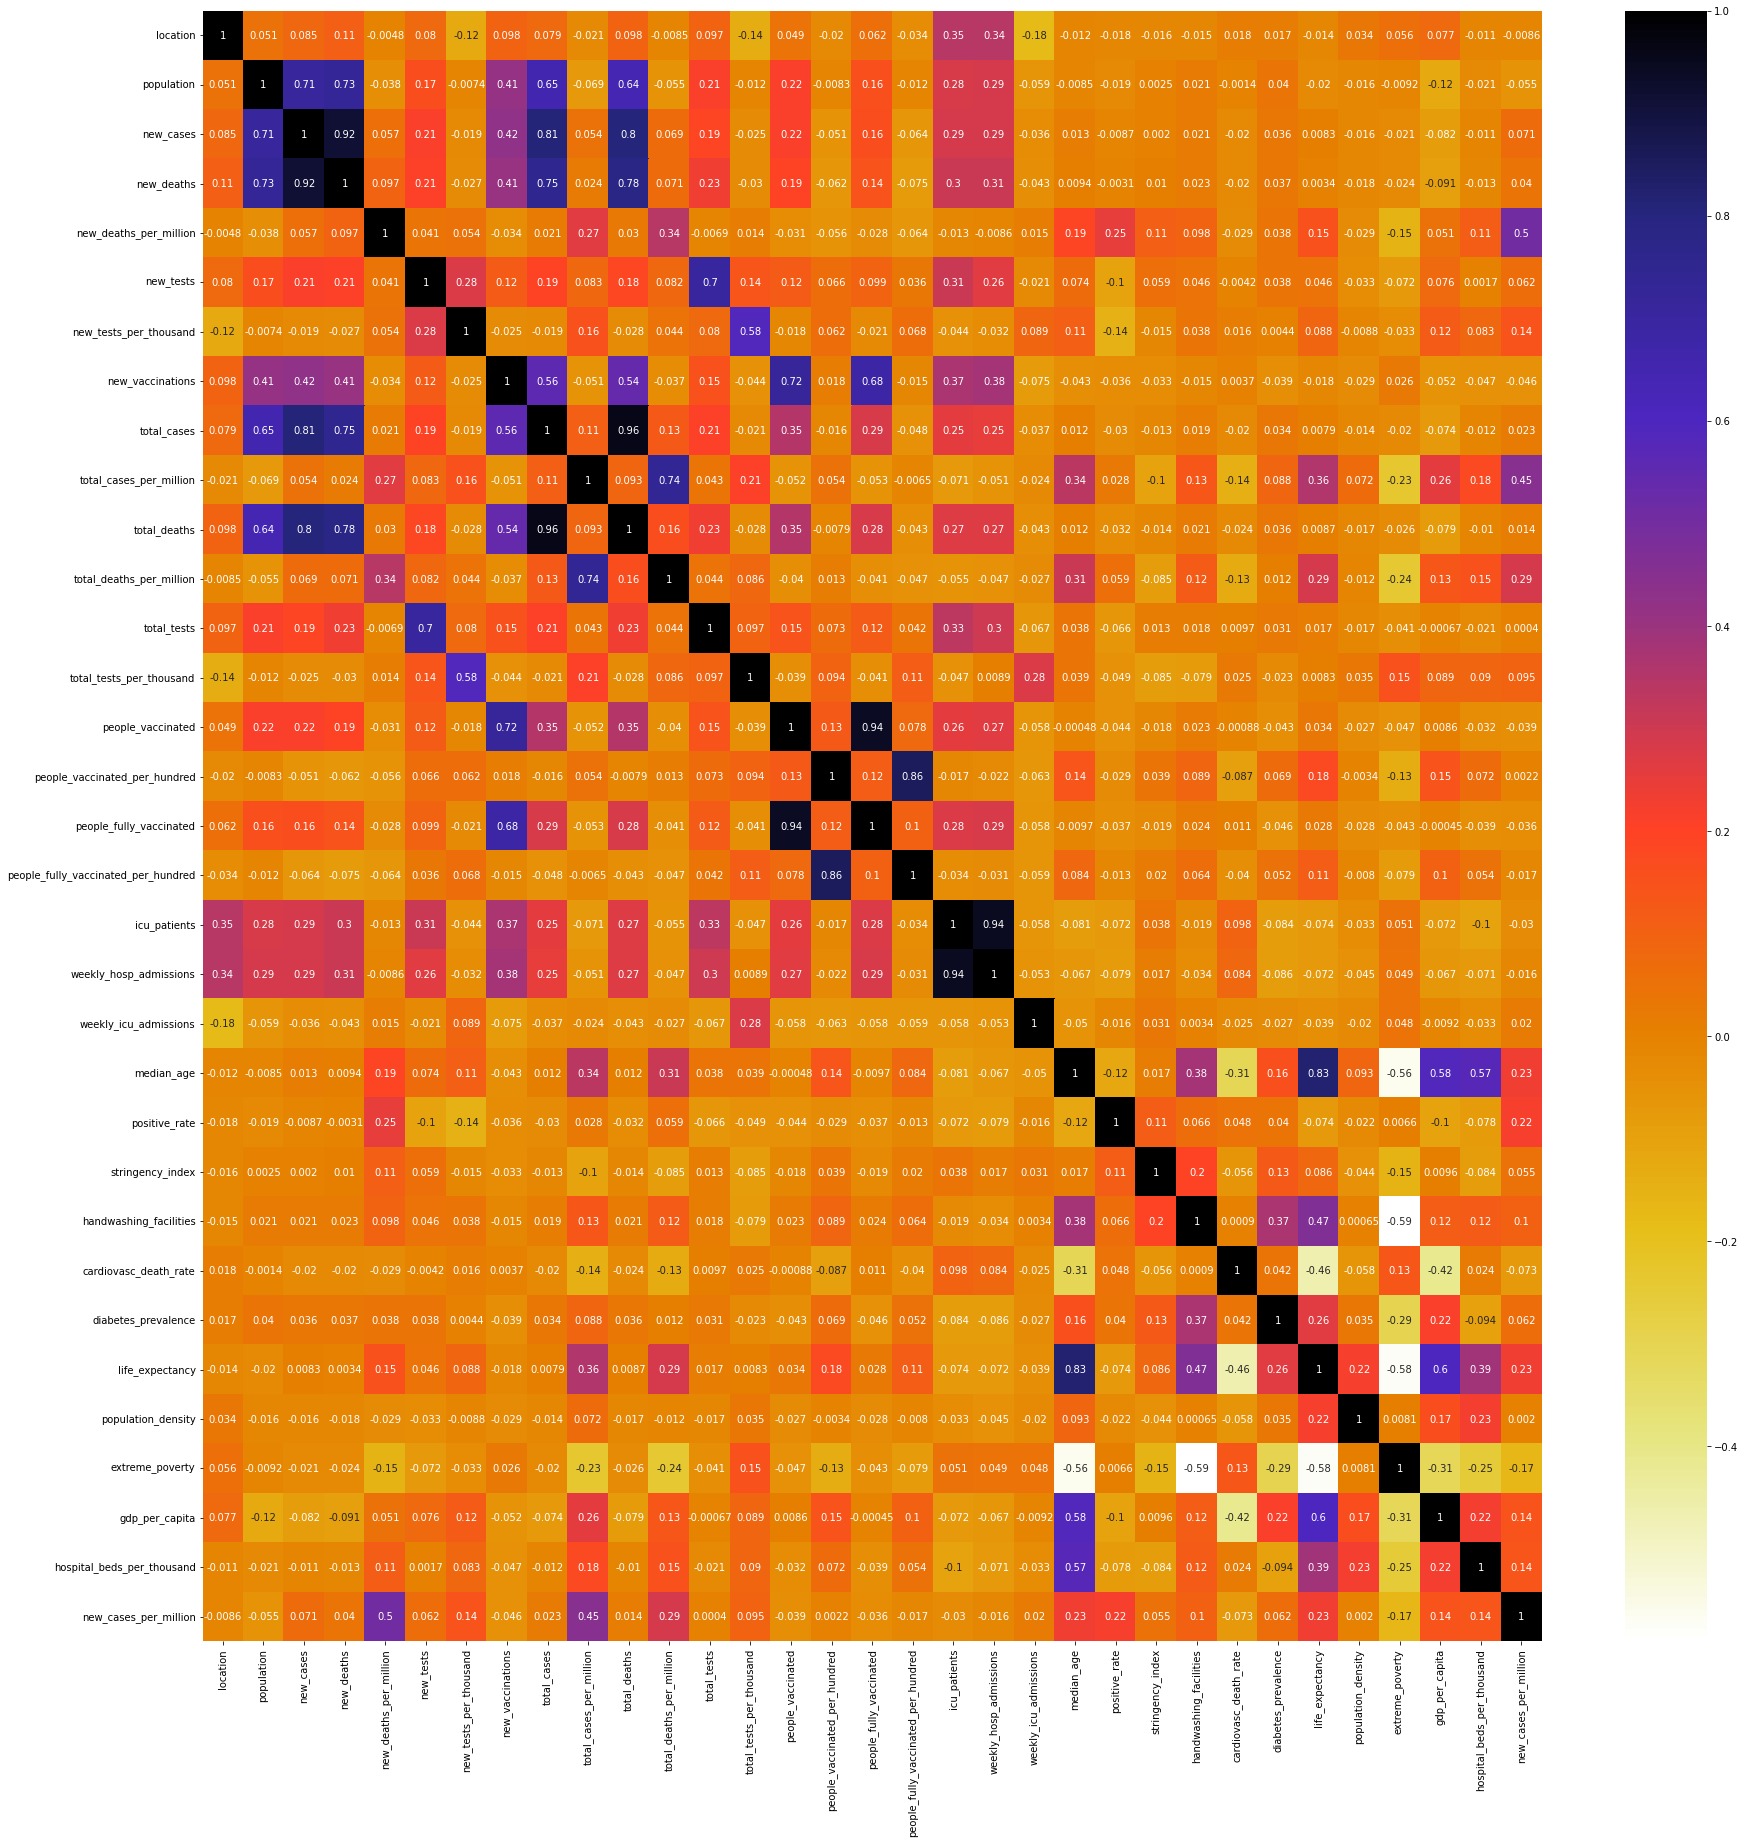

In [225]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [226]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [227]:
corr_features = correlation(data, 0.7)
len(set(corr_features))

11

In [228]:
corr_features

{'life_expectancy',
 'new_cases',
 'new_deaths',
 'people_fully_vaccinated',
 'people_fully_vaccinated_per_hundred',
 'people_vaccinated',
 'total_cases',
 'total_deaths',
 'total_deaths_per_million',
 'total_tests',
 'weekly_hosp_admissions'}

In [229]:
temp = data["total_cases"]

In [230]:
data.drop(corr_features,axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [231]:
data["total_cases"] = temp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
data.shape

(112888, 23)

###Mutual Information 

In [233]:
X=data.drop("total_cases",axis=1)
Y=data["total_cases"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [236]:
X_train_Numeric=X_train.drop("location", axis=1)
X_test_Numeric=X_test.drop("location", axis=1)

In [237]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X_train_Numeric,Y_train)
mutual_info

array([1.14902568, 0.17700701, 0.91139953, 0.88232178, 0.89344349,
       1.8753186 , 1.22673249, 1.07538558, 1.0566547 , 1.15175188,
       1.17154878, 0.78809136, 1.15438008, 1.6463248 , 1.16006458,
       1.1956679 , 1.19147594, 1.42247324, 1.17174704, 1.16138387,
       0.19635199])

In [238]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train_Numeric.columns
mutual_info.sort_values(ascending=False)

total_cases_per_million          1.875319
handwashing_facilities           1.646325
extreme_poverty                  1.422473
total_tests_per_thousand         1.226732
diabetes_prevalence              1.195668
population_density               1.191476
gdp_per_capita                   1.171747
median_age                       1.171549
hospital_beds_per_thousand       1.161384
cardiovasc_death_rate            1.160065
stringency_index                 1.154380
weekly_icu_admissions            1.151752
population                       1.149026
people_vaccinated_per_hundred    1.075386
icu_patients                     1.056655
new_tests                        0.911400
new_vaccinations                 0.893443
new_tests_per_thousand           0.882322
positive_rate                    0.788091
new_cases_per_million            0.196352
new_deaths_per_million           0.177007
dtype: float64

##Imbalance handling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


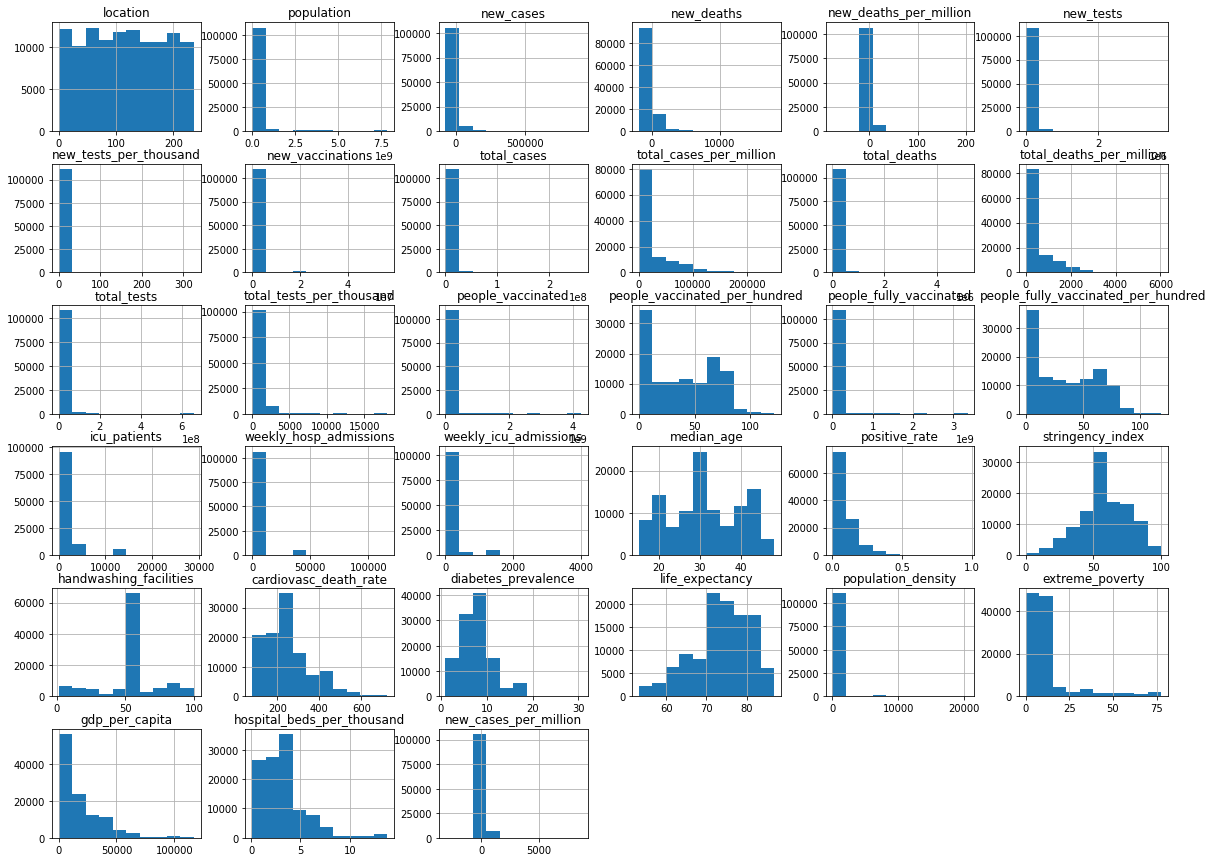

In [ ]:
from matplotlib import pyplot
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax = ax)
pyplot.show()

###RandomUnderSampling

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
datasmote = data

In [ ]:
datasmote.drop(['location', 'population'], axis = 1, inplace=True)
print("")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
datasmote.shape

(112888, 31)

In [ ]:
sc = StandardScaler()
datasmote = sc.fit_transform(data)

In [ ]:
datasmote = pd.DataFrame(datasmote, columns=data.columns)

In [ ]:
datasmote = datasmote.values
# split into input and output elements
X_imb, Y_imb = datasmote[:, :-1], datasmote[:, -1]
# label encode the target variable
Y_imb = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(Y_imb)
for k,v in counter.items():
	per = v / len(Y_imb) * 100
	print('Class=%d,	n=%d	(%.3f%%)' % (k, v, per))

Streaming output truncated to the last 5000 lines.
Class=49120,	n=1	(0.001%)
Class=48825,	n=1	(0.001%)
Class=45326,	n=1	(0.001%)
Class=37349,	n=4	(0.004%)
Class=45264,	n=1	(0.001%)
Class=40949,	n=1	(0.001%)
Class=47104,	n=1	(0.001%)
Class=40556,	n=1	(0.001%)
Class=41950,	n=2	(0.002%)
Class=42635,	n=1	(0.001%)
Class=41995,	n=1	(0.001%)
Class=39819,	n=1	(0.001%)
Class=43111,	n=1	(0.001%)
Class=43969,	n=1	(0.001%)
Class=37950,	n=3	(0.003%)
Class=43241,	n=1	(0.001%)
Class=27314,	n=2	(0.002%)
Class=32021,	n=2	(0.002%)
Class=37134,	n=2	(0.002%)
Class=37816,	n=1	(0.001%)
Class=37616,	n=1	(0.001%)
Class=43841,	n=1	(0.001%)
Class=30062,	n=2	(0.002%)
Class=31727,	n=1	(0.001%)
Class=35042,	n=2	(0.002%)
Class=40142,	n=1	(0.001%)
Class=29454,	n=1	(0.001%)
Class=33052,	n=1	(0.001%)
Class=28437,	n=2	(0.002%)
Class=42861,	n=2	(0.002%)
Class=33135,	n=1	(0.001%)
Class=34249,	n=1	(0.001%)
Class=35265,	n=1	(0.001%)
Class=37755,	n=1	(0.001%)
Class=35544,	n=1	(0.001%)
Class=39376,	n=1	(0.001%)
Class=26883,	

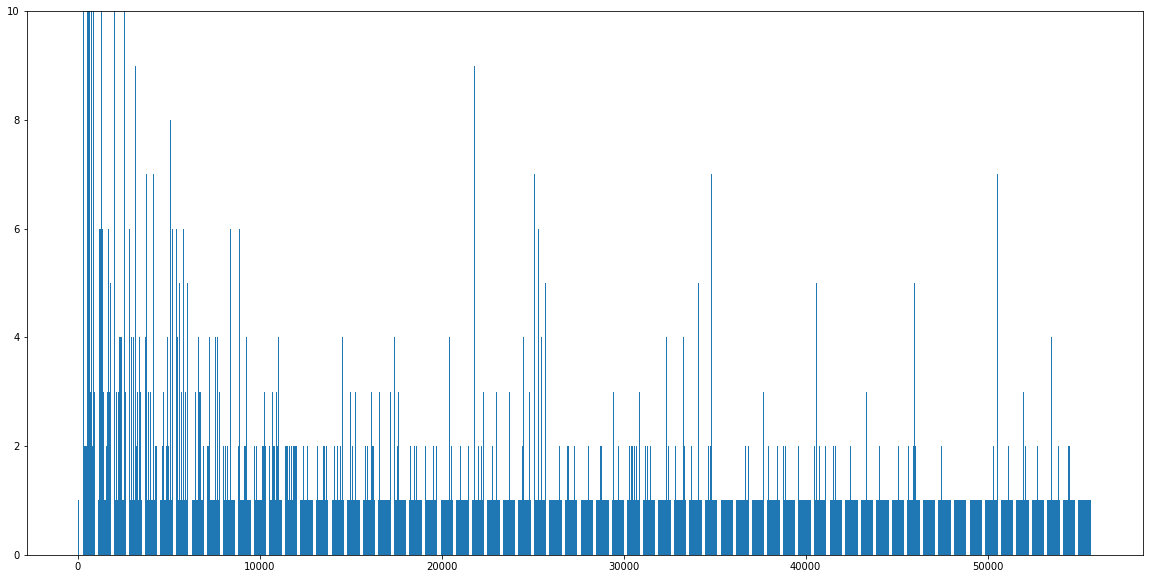

In [ ]:
import math
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
plt.ylim([0,10])
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [ ]:
#UNDERSAMPLING

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler()
X_imb, Y_imb = under.fit_resample(X_imb, Y_imb)

In [ ]:
counter = Counter(Y_imb)
for k,v in counter.items():
	per = v / len(Y_imb) * 100
	print('Class=%d,	n=%d	(%.3f%%)' % (k, v, per))

Streaming output truncated to the last 5000 lines.
Class=50735,	n=1	(0.002%)
Class=50736,	n=1	(0.002%)
Class=50737,	n=1	(0.002%)
Class=50738,	n=1	(0.002%)
Class=50739,	n=1	(0.002%)
Class=50740,	n=1	(0.002%)
Class=50741,	n=1	(0.002%)
Class=50742,	n=1	(0.002%)
Class=50743,	n=1	(0.002%)
Class=50744,	n=1	(0.002%)
Class=50745,	n=1	(0.002%)
Class=50746,	n=1	(0.002%)
Class=50747,	n=1	(0.002%)
Class=50748,	n=1	(0.002%)
Class=50749,	n=1	(0.002%)
Class=50750,	n=1	(0.002%)
Class=50751,	n=1	(0.002%)
Class=50752,	n=1	(0.002%)
Class=50753,	n=1	(0.002%)
Class=50754,	n=1	(0.002%)
Class=50755,	n=1	(0.002%)
Class=50756,	n=1	(0.002%)
Class=50757,	n=1	(0.002%)
Class=50758,	n=1	(0.002%)
Class=50759,	n=1	(0.002%)
Class=50760,	n=1	(0.002%)
Class=50761,	n=1	(0.002%)
Class=50762,	n=1	(0.002%)
Class=50763,	n=1	(0.002%)
Class=50764,	n=1	(0.002%)
Class=50765,	n=1	(0.002%)
Class=50766,	n=1	(0.002%)
Class=50767,	n=1	(0.002%)
Class=50768,	n=1	(0.002%)
Class=50769,	n=1	(0.002%)
Class=50770,	n=1	(0.002%)
Class=50771,	

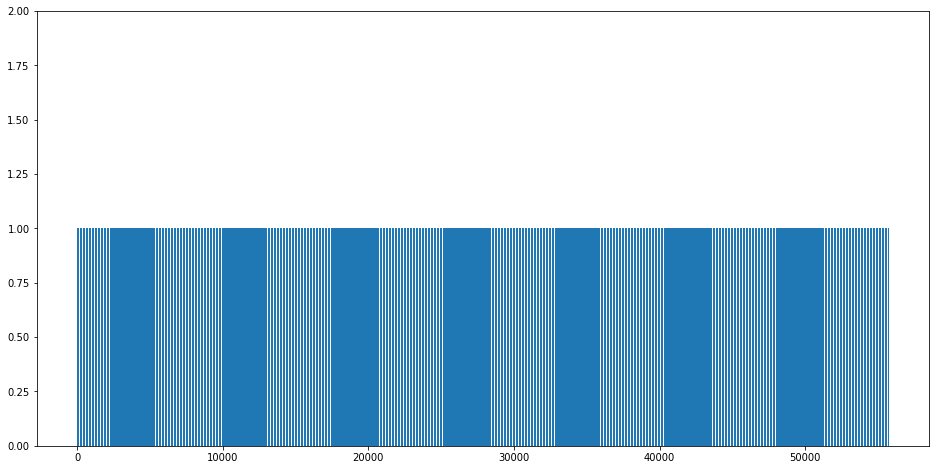

In [ ]:
fig = plt.figure(figsize = (16,8))
ax = fig.gca()
plt.ylim([0,2])
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

##Score of ML regression models after feature selection and imbalance handling

In [ ]:
datascaled = data

In [ ]:
sc = StandardScaler()
datascaled = sc.fit_transform(data)

In [ ]:
datascaled = pd.DataFrame(datascaled, columns=data.columns)

In [ ]:
X=datascaled.drop("total_cases",axis=1)
Y=datascaled["total_cases"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train_Numeric=X_train.loc[:,"new_cases":]
X_test_Numeric=X_test.loc[:,"new_cases":]

###Linear regression

In [ ]:
reg = LinearRegression().fit(X_train_Numeric,Y_train)
score=reg.score(X_test_Numeric,Y_test)
print("score:"+str(score))

score:0.9539188378842927


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(5)
knn.fit(X_train_Numeric, Y_train)
print("score:",knn.score(X_test_Numeric,Y_test))

score: 0.998489081911453


#Time Series

In [ ]:
ts=newdf[['date','new_cases']].groupby('date').agg("sum")
ts=pd.DataFrame(ts)
ts=ts.reset_index()
print(ts)

           date  new_cases
0    2020-01-01        0.0
1    2020-01-02        0.0
2    2020-01-03        0.0
3    2020-01-04        0.0
4    2020-01-05        0.0
..          ...        ...
692  2021-11-23  2604867.0
693  2021-11-24  3013267.0
694  2021-11-25  2708243.0
695  2021-11-26  2679668.0
696  2021-11-27  1848044.0

[697 rows x 2 columns]


In [ ]:
#from datetime import datetime
ts['date']=pd.to_datetime(ts['date'])
ts=ts.set_index('date')
print(ts)

            new_cases
date                 
2020-01-01        0.0
2020-01-02        0.0
2020-01-03        0.0
2020-01-04        0.0
2020-01-05        0.0
...               ...
2021-11-23  2604867.0
2021-11-24  3013267.0
2021-11-25  2708243.0
2021-11-26  2679668.0
2021-11-27  1848044.0

[697 rows x 1 columns]


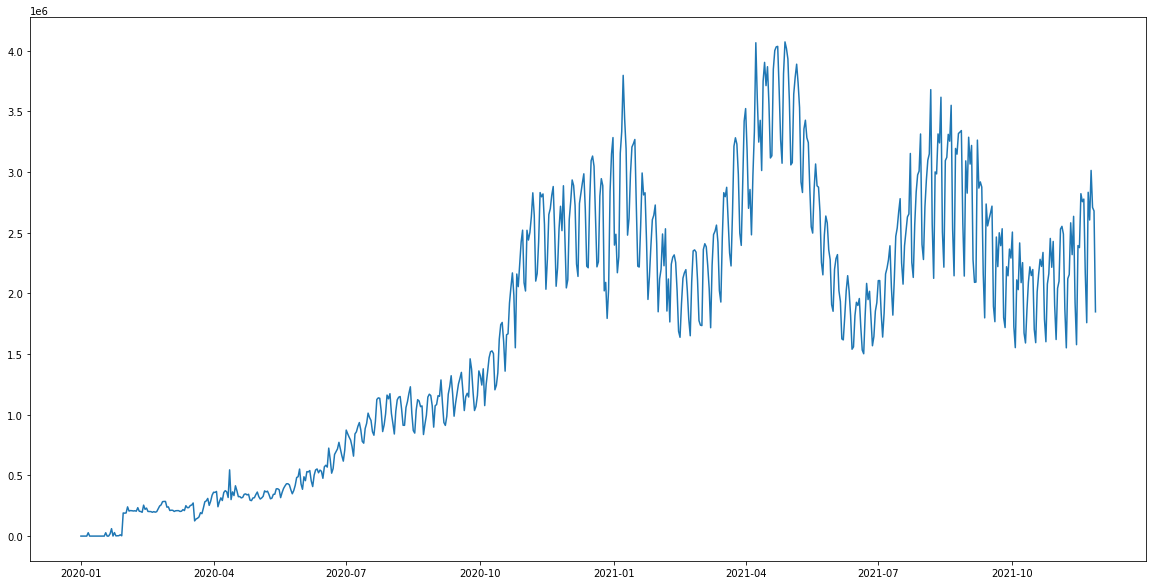

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(ts)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 432x288 with 0 Axes>

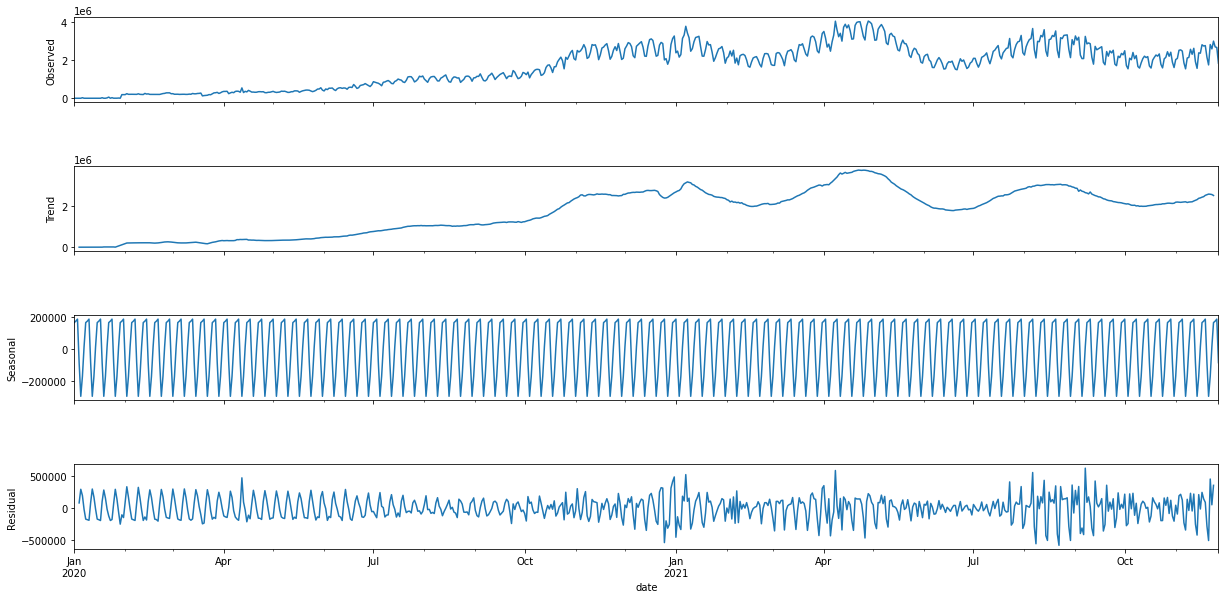

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['new_cases'], model='additive')

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(20,10)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()#pd.rolling_mean(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()#pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    plt.figure(figsize=(20, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)

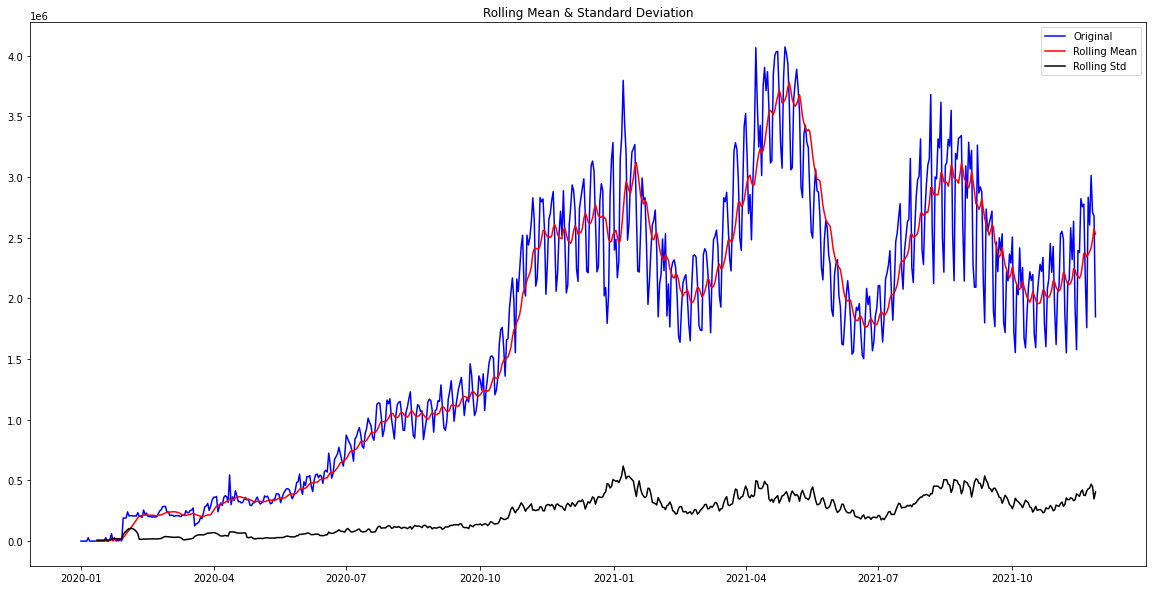

Results of Dickey-Fuller Test:
Test Statistic                  -1.986041
p-value                          0.292727
#Lags Used                      15.000000
Number of Observations Used    681.000000
Critical Value (1%)             -3.439989
Critical Value (5%)             -2.865793
Critical Value (10%)            -2.569035
dtype: float64


In [ ]:
test_stationarity(ts['new_cases'])

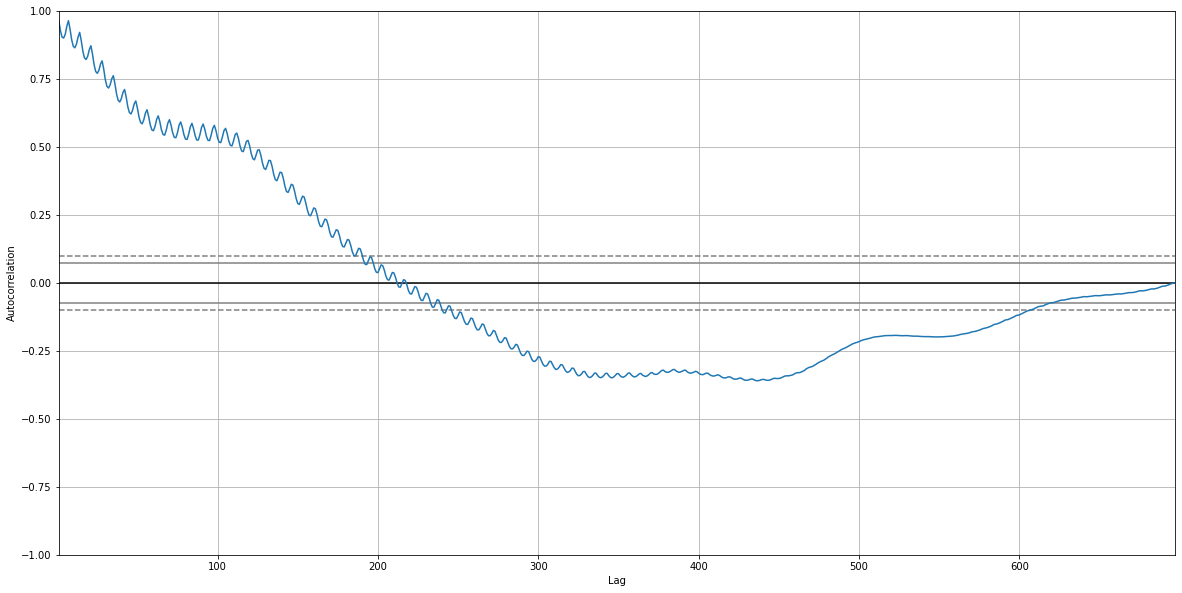

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20, 10))
autocorrelation_plot(ts)